<a href="https://colab.research.google.com/github/Fabioaugustmp/ml-politicas-energeticas-ifg-2025/blob/main/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Célula de Código 1: Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Após executar, verifique se a pasta do seu projeto aparece na aba de arquivos à esquerda.
# O caminho para seus dados será algo como: '/content/drive/MyDrive/Projeto_ONS_Goias/dados/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Célula de Código 2: Instalar bibliotecas geoespaciais
!pip install pandas geopandas matplotlib seaborn

In [9]:
# Célula de Código 3: Carregar e Inspecionar Dados da ANEEL
import pandas as pd

# ATENÇÃO: Ajuste o caminho abaixo para corresponder exatamente ao nome do seu arquivo!
caminho_aneel = '/content/drive/MyDrive/ESTUDOS/POS-IA-IFG/TRABALHO-FINAL-MODULO-II/ANEEL-SIGA-SISTEMAS-DE-INFORMAÇÃO-GERAÇÃO/siga-empreendimentos-geracao.csv'

# Carregar o dataset. O 'encoding' e 'sep' são importantes para arquivos do governo brasileiro.
df_usinas_brasil = pd.read_csv(caminho_aneel, encoding='ISO-8859-1', sep=';')

# 1. Visualizar as 5 primeiras linhas para entender a estrutura
print("### Amostra dos Dados ###")
print(df_usinas_brasil.head())

# 2. Obter informações sobre as colunas e tipos de dados
print("\n### Informações Gerais (Colunas e Tipos) ###")
df_usinas_brasil.info()

### Amostra dos Dados ###
  DatGeracaoConjuntoDados NomEmpreendimento  IdeNucleoCEG  \
0              2025-09-22                 E             8   
1              2025-09-22                 F             9   
2              2025-09-22                 G            10   
3              2025-09-22       14 de Julho            12   
4              2025-09-22            Abaúna            15   

                 CodCEG SigUFPrincipal SigTipoGeracao DscFaseUsina  \
0  PCH.PH.MG.000008-6.1             MG            PCH     Operação   
1  PCH.PH.MG.000009-4.1             MG            PCH     Operação   
2  PCH.PH.MG.000010-8.1             MG            PCH     Operação   
3  UHE.PH.RS.000012-4.1             RS            UHE     Operação   
4  CGH.PH.RS.000015-9.1             RS            CGH     Operação   

  DscOrigemCombustivel   DscFonteCombustivel DscTipoOutorga  ...  \
0              Hídrica  Potencial hidráulico    Autorização  ...   
1              Hídrica  Potencial hidráulico    Au

In [10]:
# Célula de Código 4: Limpeza e Filtragem
# Converter colunas de coordenadas para formato numérico, forçando erros a se tornarem 'NaN' (Not a Number)
# Note que a ANEEL usa vírgula como separador decimal, então precisamos substituí-la por ponto.
df_usinas_brasil['Latitude'] = df_usinas_brasil['NumCoordNEmpreendimento'].str.replace(',', '.', regex=False)
df_usinas_brasil['Longitude'] = df_usinas_brasil['NumCoordEEmpreendimento'].str.replace(',', '.', regex=False)

df_usinas_brasil['Latitude'] = pd.to_numeric(df_usinas_brasil['Latitude'], errors='coerce')
df_usinas_brasil['Longitude'] = pd.to_numeric(df_usinas_brasil['Longitude'], errors='coerce')

# Remover linhas onde as coordenadas são nulas (não podemos mapeá-las)
df_usinas_brasil.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Filtrar o DataFrame para conter apenas usinas de Goiás (GO)
df_usinas_goias = df_usinas_brasil[df_usinas_brasil['SigUFPrincipal'] == 'GO'].copy()

print(f"Encontramos {len(df_usinas_goias)} usinas com coordenadas válidas em Goiás.")
print("Amostra das usinas de Goiás:")
print(df_usinas_goias[['NomEmpreendimento', 'SigTipoGeracao', 'MdaGarantiaFisicaKw', 'Latitude', 'Longitude']].head())

Encontramos 288 usinas com coordenadas válidas em Goiás.
Amostra das usinas de Goiás:
     NomEmpreendimento SigTipoGeracao MdaGarantiaFisicaKw   Latitude  \
83   Cachoeira Dourada            UHE           374600,00 -18.504327   
93          Cana Brava            UHE           247800,00 -13.402387   
136          Corumbá I            UHE           217400,00 -17.987860   
144             Espora            UHE            21400,00 -18.675833   
201              Irara            PCH            18210,00 -18.067500   

     Longitude  
83  -49.490220  
93  -48.143329  
136 -48.532318  
144 -51.865556  
201 -51.167500  


# Mapa de região

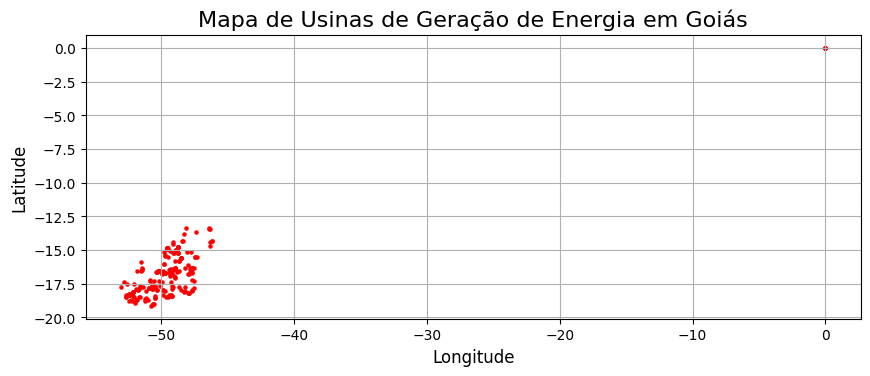

In [11]:
# Célula de Código 5: Criando o primeiro mapa
import geopandas as gpd
import matplotlib.pyplot as plt

# Converter o DataFrame do pandas para um GeoDataFrame
gdf_usinas_goias = gpd.GeoDataFrame(
    df_usinas_goias,
    geometry=gpd.points_from_xy(df_usinas_goias.Longitude, df_usinas_goias.Latitude),
    crs="EPSG:4326"  # Sistema de coordenadas padrão (WGS84)
)

# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 10))
gdf_usinas_goias.plot(ax=ax, marker='o', color='red', markersize=5)

# Adicionar títulos e rótulos
ax.set_title('Mapa de Usinas de Geração de Energia em Goiás', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.show()

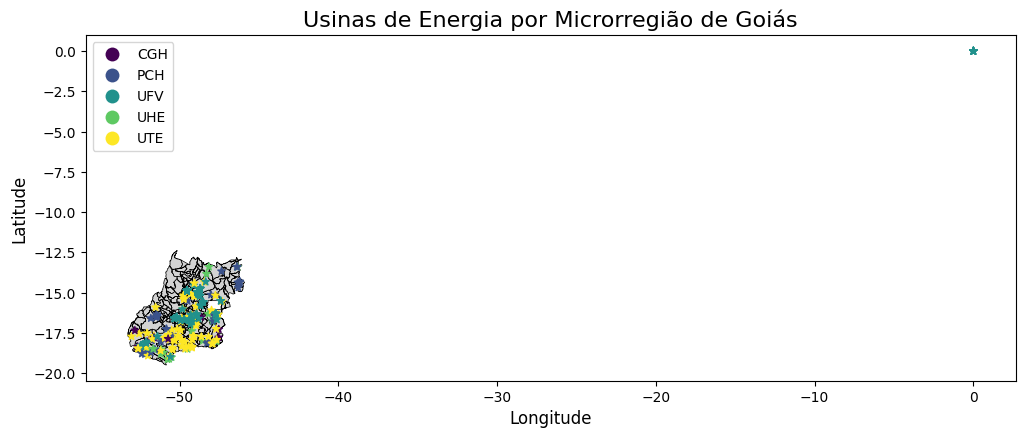

In [12]:
# Célula de Código 6: Carregando e plotando o mapa das microrregiões
# ATENÇÃO: O caminho deve apontar para a pasta que contém o arquivo .shp e seus arquivos auxiliares.
caminho_shapefile_goias = '/content/drive/MyDrive/ESTUDOS/POS-IA-IFG/TRABALHO-FINAL-MODULO-II/GO-MICROREGIOES/' # Exemplo de caminho

# Carregar o shapefile
gdf_microrregioes_goias = gpd.read_file(caminho_shapefile_goias)

# Criar um mapa combinando as microrregiões e as usinas
fig, ax = plt.subplots(figsize=(12, 12))

# 1. Plotar o mapa base das microrregiões
gdf_microrregioes_goias.plot(ax=ax, edgecolor='black', color='lightgray', linewidth=0.5)

# 2. Sobrepor o mapa com a localização das usinas
gdf_usinas_goias.plot(ax=ax, marker='*', column='SigTipoGeracao', markersize=30, legend=True, cmap='viridis')

# Adicionar títulos e rótulos
ax.set_title('Usinas de Energia por Microrregião de Goiás', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.show()

# Dados Meteriológicos


### Amostra dos Dados Processados ###
                           data hora_utc  precipitacao_mm  pressao_atm_mb  \
datetime                                                                    
2024-01-01 00:00:00  2024/01/01    00:00              NaN             NaN   
2024-01-01 01:00:00  2024/01/01    01:00              NaN           956.7   
2024-01-01 02:00:00  2024/01/01    02:00              NaN             NaN   
2024-01-01 03:00:00  2024/01/01    03:00              NaN           957.1   
2024-01-01 04:00:00  2024/01/01    04:00              NaN           956.4   

                     pressao_max_mb  pressao_min_mb  radiacao_global_kj_m2  \
datetime                                                                     
2024-01-01 00:00:00             NaN             NaN                    NaN   
2024-01-01 01:00:00           956.7           955.7                    0.0   
2024-01-01 02:00:00             NaN             NaN                    NaN   
2024-01-01 03:00:00           9

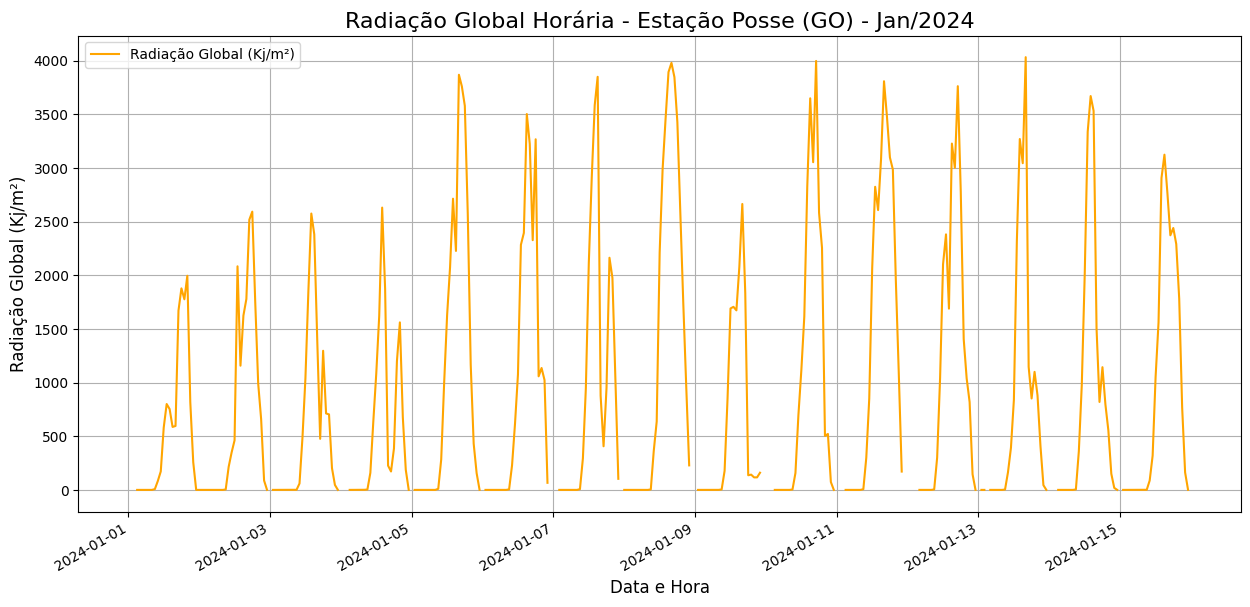

In [13]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- PASSO 1: DEFINA O CAMINHO DO ARQUIVO ---
# Ajuste este caminho para corresponder à localização do seu arquivo no Google Drive
caminho_do_arquivo = '/content/drive/MyDrive/ESTUDOS/POS-IA-IFG/TRABALHO-FINAL-MODULO-II/INMET-DADOS-METERIOLOGICOS/INMET_CO_GO_A035_ITUMBIARA_01-01-2024_A_31-12-2024.CSV'

try:
    # --- PASSO 2: CARREGAR OS DADOS ---
    # Este comando lê o arquivo CSV, pulando o cabeçalho e tratando os separadores de coluna (;) e decimal (,)
    df_inmet = pd.read_csv(
        caminho_do_arquivo,
        sep=';',
        skiprows=8,
        encoding='latin-1',
        decimal=','
    )


    # --- PASSO 3: LIMPEZA E TRANSFORMAÇÃO ---
    # Remove a última coluna que geralmente é importada vazia
    df_inmet = df_inmet.iloc[:, :-1]

    # Renomeia as colunas para nomes mais curtos e fáceis de usar em Python
    df_inmet.columns = [
        'data', 'hora_utc', 'precipitacao_mm', 'pressao_atm_mb',
        'pressao_max_mb', 'pressao_min_mb', 'radiacao_global_kj_m2',
        'temp_ar_c', 'temp_orvalho_c', 'temp_max_c', 'temp_min_c',
        'temp_orvalho_max_c', 'temp_orvalho_min_c', 'umidade_max_pct',
        'umidade_min_pct', 'umidade_horaria_pct', 'vento_dir_gr',
        'vento_rajada_ms', 'vento_vel_ms'
    ]

    # Combina as colunas 'data' e 'hora_utc' em uma única coluna de data e hora
    df_inmet['hora_utc'] = df_inmet['hora_utc'].str.slice(0, 2) + ':' + df_inmet['hora_utc'].str.slice(2, 4)
    df_inmet['datetime'] = pd.to_datetime(df_inmet['data'] + ' ' + df_inmet['hora_utc'], format='%Y/%m/%d %H:%M')

    # Define a coluna 'datetime' como o índice do DataFrame, o que é ótimo para trabalhar com séries temporais
    df_inmet.set_index('datetime', inplace=True)

    print("\n### Amostra dos Dados Processados ###")
    print(df_inmet.head())

    # --- PASSO 4: ANÁLISE E VISUALIZAÇÃO ---
    print("\nGerando gráfico de Radiação Global para a primeira quinzena de Janeiro de 2024...")

    # Filtra os dados para visualizar apenas as duas primeiras semanas de janeiro
    janeiro_df = df_inmet['2024-01-01':'2024-01-15']

    # Cria a figura e os eixos para o gráfico
    fig, ax = plt.subplots(figsize=(15, 7))

    # Plota a radiação global ao longo do tempo
    ax.plot(janeiro_df.index, janeiro_df['radiacao_global_kj_m2'], label='Radiação Global (Kj/m²)', color='orange')

    # Adiciona títulos e rótulos para clareza
    ax.set_title('Radiação Global Horária - Estação Posse (GO) - Jan/2024', fontsize=16)
    ax.set_xlabel('Data e Hora', fontsize=12)
    ax.set_ylabel('Radiação Global (Kj/m²)', fontsize=12)
    ax.grid(True)
    ax.legend()

    # Melhora a formatação das datas no eixo X para evitar sobreposição
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()

    # Exibe o gráfico
    plt.show()

except FileNotFoundError:
    print("Por favor, verifique se o caminho no Google Drive está correto.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

In [14]:
# Calcular a média diária de radiação
radiacao_media_diaria = df_inmet['radiacao_global_kj_m2'].resample('D').mean()
print(radiacao_media_diaria.head())

datetime
2024-01-01     544.240909
2024-01-02     677.929167
2024-01-03     575.073913
2024-01-04     564.263636
2024-01-05    1106.921739
Freq: D, Name: radiacao_global_kj_m2, dtype: float64


# Dados PIB

Carregando os arquivos

In [15]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# --- PASSO 1: CAMINHOS PARA OS ARQUIVOS (AJUSTE-OS!) ---
caminho_pib_csv = '/content/drive/MyDrive/ESTUDOS/POS-IA-IFG/TRABALHO-FINAL-MODULO-II/PIB/consulta-pib-go.csv'
# Este caminho deve apontar para a pasta que contém o .shp dos MUNICÍPIOS de Goiás
caminho_municipios_shp = '/content/drive/MyDrive/ESTUDOS/POS-IA-IFG/TRABALHO-FINAL-MODULO-II/GO-MICROREGIOES/'

Processando dados PIB

In [16]:
print("Processando arquivo de PIB...")
df_pib_raw = pd.read_csv(caminho_pib_csv, sep=';', encoding='latin-1', decimal=',')

df_pib_raw.head()

Processando arquivo de PIB...


,Localidade,Variável,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Abadia de Goiás,Produto Interno Bruto a Preços Correntes - PIB...,19.813,22.773,23.756,28.156,31.165,34.506,40.681,43.515,...,146.855,159.333,185.289,171.702,166.412,233.954,227.500,202.316,279.328,353.700
1,Abadia de Goiás,Produto Interno Bruto per Capita (R$),...,...,...,...,...,...,...,...,...,"20.499,05","21.056,25","23.960,79","21.748,15","20.664,57",28.507,26.506,23.061,31182,"21.334,94"
2,Abadiânia,Produto Interno Bruto a Preços Correntes - PIB...,38.867,49.555,55.021,54.880,61.801,75.699,84.745,97.178,...,190.662,219.355,281.463,289.003,287.984,303.352,316.432,346.768,412.885,445.324
3,Abadiânia,Produto Interno Bruto per Capita (R$),...,...,...,...,...,...,...,...,...,"11.620,07","12.660,43","15.900,94","15.994,41","15.628,40",16.157,16.133,17.302,20179,"46.315,90"
4,Acreúna,Produto Interno Bruto a Preços Correntes - PIB...,248.595,279.754,289.387,252.057,229.738,235.145,270.196,314.612,...,449.013,484.361,520.633,519.570,614.411,672.309,671.478,664.899,804.208,1.051.834


In [17]:


# Filtrar apenas pela variável de interesse
df_pib_filtrado = df_pib_raw[df_pib_raw['Variável'] == 'Produto Interno Bruto a Preços Correntes - PIB (R$ mil)'].copy()

# Transformar de formato largo para longo (pivotar os anos)
df_pib_long = df_pib_filtrado.melt(
    id_vars=['Localidade', 'Variável'],
    var_name='ano',
    value_name='pib_valor_str'
)

# Função para limpar os valores do PIB
def limpar_pib(valor):
    if isinstance(valor, str):
        try:
            valor_limpo = valor.strip().replace('.', '').replace(',', '.')
            return float(valor_limpo)
        except (ValueError, AttributeError):
            return np.nan
    return valor

df_pib_long['pib_mil_reais'] = df_pib_long['pib_valor_str'].apply(limpar_pib)
df_pib_long['Localidade'] = df_pib_long['Localidade'].str.strip()

# Selecionar o ano mais recente para a análise
ano_recente = df_pib_long['ano'].max()
df_pib_recente = df_pib_long[df_pib_long['ano'] == ano_recente]

# Criar o DataFrame final com os dados de PIB limpos
df_pib_final = df_pib_recente[['Localidade', 'pib_mil_reais']].rename(columns={'Localidade': 'NM_MUN'})
df_pib_final.dropna(inplace=True)
print(f"Dados de PIB para o ano de {ano_recente} processados com sucesso!")

Dados de PIB para o ano de 2021 processados com sucesso!



Carregando mapa de municípios...
Mapa de municípios de Goiás carregado!

Juntando dados de PIB com o mapa de municípios...
    CD_MUN                  NM_MUN  CD_RGI                      NM_RGI  \
0  5219902  São Francisco de Goiás  520002                    Anápolis   
1  5215652      Palestina de Goiás  520014                       Iporá   
2  5208400             Goianápolis  520002                    Anápolis   
3  5207105                 Diorama  520014                       Iporá   
4  5218607                  Rialma  520018  Ceres - Rialma - Goianésia   

  CD_RGINT                          NM_RGINT CD_UF  NM_UF SIGLA_UF CD_REGIA  \
0     5201                           Goiânia    52  Goiás       GO        5   
1     5204  São Luís de Montes Belos - Iporá    52  Goiás       GO        5   
2     5201                           Goiânia    52  Goiás       GO        5   
3     5204  São Luís de Montes Belos - Iporá    52  Goiás       GO        5   
4     5205                Porangatu 

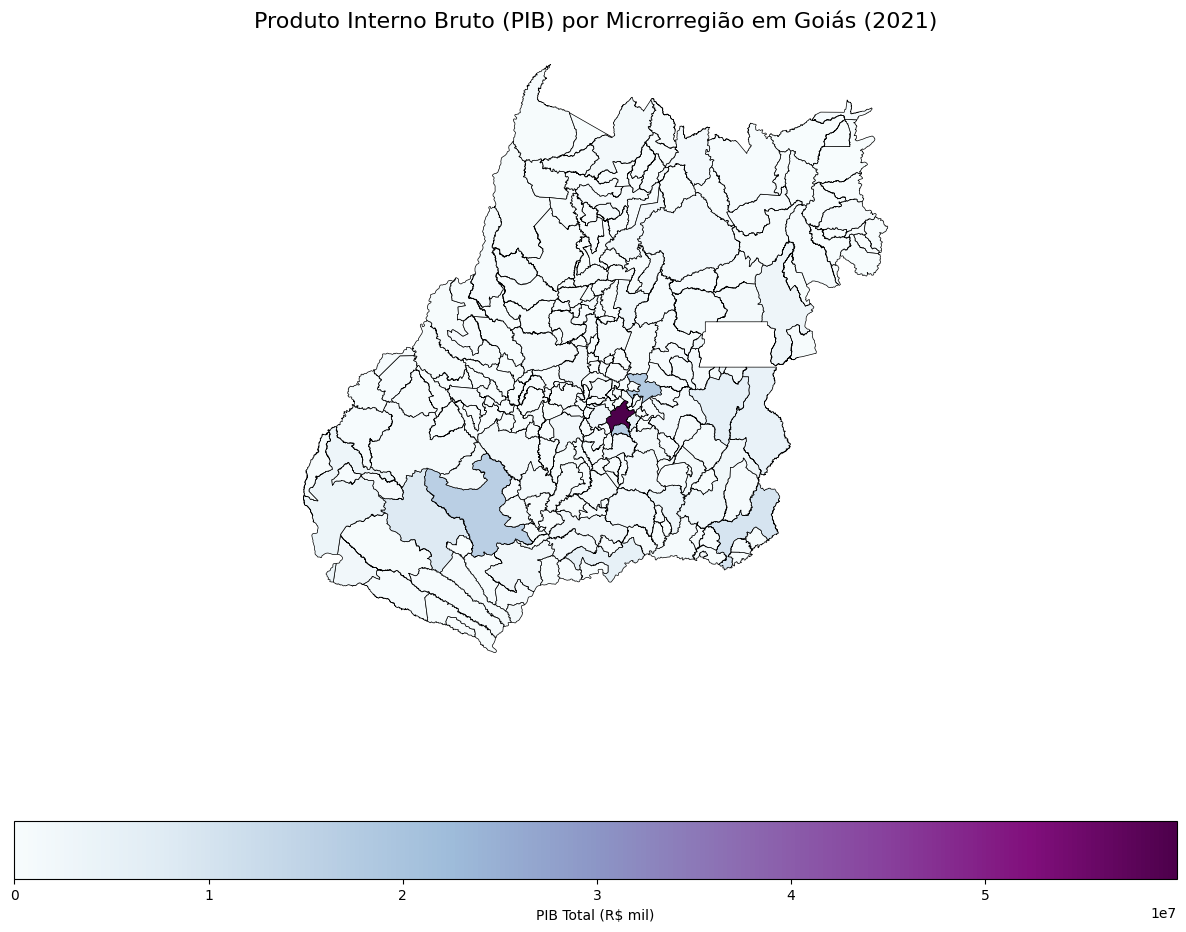

In [18]:
# --- PASSO 3: CARREGAR DADOS GEOESPACIAIS DOS MUNICÍPIOS ---
print("\nCarregando mapa de municípios...")
gdf_municipios = gpd.read_file(caminho_municipios_shp)
print("Mapa de municípios de Goiás carregado!")

# --- PASSO 4: JUNTAR (MERGE) DADOS DE PIB E MAPA ---
print("\nJuntando dados de PIB com o mapa de municípios...")
# A junção é feita usando o nome do município ('NM_MUN') como chave
gdf_municipios_pib = gdf_municipios.merge(df_pib_final, on='NM_MUN', how='left')

print(gdf_municipios_pib.head())

# Verificar se algum município do mapa não encontrou um correspondente no arquivo de PIB
municipios_sem_pib = gdf_municipios_pib[gdf_municipios_pib['pib_mil_reais'].isnull()]
if not municipios_sem_pib.empty:
    print(f"⚠️ Atenção: {len(municipios_sem_pib)} municípios não encontraram dados de PIB correspondentes. Isso pode ocorrer por nomes diferentes entre os arquivos.")
    print(municipios_sem_pib['NM_MUN'].tolist()) # Descomente esta linha para ver os nomes

print("Junção de dados concluída!")

# --- PASSO 5: AGREGAR O PIB POR MICRORREGIÃO ---
print("\nAgregando PIB por microrregião...")
# Agrupa os municípios pela coluna de nome da microrregião e soma o PIB
# O nome da coluna da microrregião pode variar (ex: 'NM_MICRO', 'NM_MIC'), verifique no seu shapefile
# Vamos usar 'NM_MICRO' como exemplo
pib_por_microrregiao = gdf_municipios_pib.groupby('CD_MUN')['pib_mil_reais'].sum().reset_index()

# Carregar o shapefile das MICRORREGIÕES para juntar os dados agregados
gdf_microrregioes = gpd.read_file(caminho_shapefile_goias)
print(gdf_microrregioes.head())

# Juntar os dados de PIB agregado ao mapa de microrregiões
gdf_microrregioes_pib = gdf_microrregioes.merge(pib_por_microrregiao, on='CD_MUN', how='left')
print("Agregação do PIB por microrregião concluída!")

# --- PASSO 6: VISUALIZAR O RESULTADO FINAL ---
print("\nGerando mapa de PIB por microrregião...")
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
gdf_microrregioes_pib.plot(column='pib_mil_reais',
                            ax=ax,
                            legend=True,
                            cmap='BuPu', # Esquema de cores (Azul-Roxo)
                            edgecolor='black',
                            linewidth=0.5,
                            legend_kwds={'label': "PIB Total (R$ mil)", 'orientation': "horizontal"})
ax.set_title(f'Produto Interno Bruto (PIB) por Microrregião em Goiás ({ano_recente})', fontsize=16)
ax.set_axis_off() # Remove os eixos de latitude/longitude para um visual mais limpo
plt.show()

# Linhas de Transmissão


# Fundação GeoEspacial

## Carregando o arquivo de microrregioes

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt

caminho_shapefile_microrregioes = '/content/drive/MyDrive/ESTUDOS/POS-IA-IFG/TRABALHO-FINAL-MODULO-II/GO-MICROREGIOES/'

try:
  gdf_microrregioes = gpd.read_file(caminho_shapefile_microrregioes)
  print("Shapefile das microrregiões carregado com sucesso!")
  print(gdf_microrregioes.head())

except FileNotFoundError:
    print(f"Erro: O arquivo shapefile não foi encontrado no caminho especificado: {caminho_shapefile_microrregioes}")
except Exception as e:
    print(f"Ocorreu um erro ao processar o shapefile: {e}")

Shapefile das microrregiões carregado com sucesso!
    CD_MUN                  NM_MUN  CD_RGI                      NM_RGI  \
0  5219902  São Francisco de Goiás  520002                    Anápolis   
1  5215652      Palestina de Goiás  520014                       Iporá   
2  5208400             Goianápolis  520002                    Anápolis   
3  5207105                 Diorama  520014                       Iporá   
4  5218607                  Rialma  520018  Ceres - Rialma - Goianésia   

  CD_RGINT                          NM_RGINT CD_UF  NM_UF SIGLA_UF CD_REGIA  \
0     5201                           Goiânia    52  Goiás       GO        5   
1     5204  São Luís de Montes Belos - Iporá    52  Goiás       GO        5   
2     5201                           Goiânia    52  Goiás       GO        5   
3     5204  São Luís de Montes Belos - Iporá    52  Goiás       GO        5   
4     5205                Porangatu - Uruaçu    52  Goiás       GO        5   

       NM_REGIA SIGLA_RG CD_C

## Cálculo de microrregião

*   Calcular a área de cada microrregião em km²
*   EPSG:31983 (SIRGAS 2000 / UTM zone 23S) é comum para Goiás.
*   Validando CRS atual

In [20]:

    if gdf_microrregioes.crs is None:
        print("CRS do GeoDataFrame não definido. Assumindo EPSG:4326 e reprojetando para EPSG:31983 para cálculo de área.")
        # Assumindo que os dados originais estão em WGS84 (EPSG:4326) e reprojetando
        gdf_microrregioes = gdf_microrregioes.set_crs("EPSG:4326", allow_override=True).to_crs("EPSG:31983")
    elif gdf_microrregioes.crs.to_epsg() != 31983:
         print(f"Reprojetando GeoDataFrame de {gdf_microrregioes.crs.to_epsg()} para EPSG:31983 para cálculo de área.")
         gdf_microrregioes = gdf_microrregioes.to_crs("EPSG:31983")
    else:
        print("CRS do GeoDataFrame já é EPSG:31983.")

Reprojetando GeoDataFrame de 4674 para EPSG:31983 para cálculo de área.


## Conversões

1.   Convertendo m² para km²
2.   Calcular o centroide de cada microrregião
3.   Extrair as coordenadas X (Longitude) e Y (Latitude) do centroide



In [21]:
gdf_microrregioes['area_km2'] = gdf_microrregioes.geometry.area / 10**6 # Convertendo m² para km²

# Calcular o centroide de cada microrregião (retorna um objeto Point)
gdf_microrregioes['centroid'] = gdf_microrregioes.geometry.centroid

# Extrair as coordenadas X (Longitude) e Y (Latitude) do centroide
gdf_microrregioes['centroid_longitude'] = gdf_microrregioes['centroid'].x
gdf_microrregioes['centroid_latitude'] = gdf_microrregioes['centroid'].y

print("\n>>>> Propriedades geométricas calculadas:")
print(gdf_microrregioes[['NM_MUN', 'area_km2', 'centroid_longitude', 'centroid_latitude']].head())

print("\n>>>> Propriedades geométricas gerais:")
print(gdf_microrregioes.head())


>>>> Propriedades geométricas calculadas:
                   NM_MUN     area_km2  centroid_longitude  centroid_latitude
0  São Francisco de Goiás   418.344786        44315.666319       8.231780e+06
1      Palestina de Goiás  1332.478109      -187969.819926       8.141981e+06
2             Goianápolis   167.286735        65794.995316       8.169711e+06
3                 Diorama   692.700406      -179877.428246       8.195802e+06
4                  Rialma   269.651491        13151.961522       8.298883e+06

>>>> Propriedades geométricas gerais:
    CD_MUN                  NM_MUN  CD_RGI                      NM_RGI  \
0  5219902  São Francisco de Goiás  520002                    Anápolis   
1  5215652      Palestina de Goiás  520014                       Iporá   
2  5208400             Goianápolis  520002                    Anápolis   
3  5207105                 Diorama  520014                       Iporá   
4  5218607                  Rialma  520018  Ceres - Rialma - Goianésia   

  CD_

## Armazenando dados de análise

## DataFrame com os dados relevantes das microrregiões

In [22]:
if 'gdf_microrregioes' in locals() and not gdf_microrregioes.empty:
    df_microrregioes_analise = gdf_microrregioes[['CD_MUN','NM_MUN', 'area_km2', 'centroid_longitude', 'centroid_latitude']].copy()

    caminho_csv_microrregioes = '/content/drive/MyDrive/ESTUDOS/POS-IA-IFG/TRABALHO-FINAL-MODULO-II/ANALISE/Dados_Microrregioes_Analise.csv'

    df_microrregioes_analise.to_csv(caminho_csv_microrregioes, index=False, encoding='utf-8')

    print(f"Dados das microrregiões para análise salvos em: {caminho_csv_microrregioes}")
    print("\nAmostra do novo DataFrame:")
    print(df_microrregioes_analise.head())
else:
    print("Erro: O GeoDataFrame 'gdf_microrregioes' não foi encontrado ou está vazio. Por favor, execute as células anteriores.")

Dados das microrregiões para análise salvos em: /content/drive/MyDrive/ESTUDOS/POS-IA-IFG/TRABALHO-FINAL-MODULO-II/ANALISE/Dados_Microrregioes_Analise.csv

Amostra do novo DataFrame:
    CD_MUN                  NM_MUN     area_km2  centroid_longitude  \
0  5219902  São Francisco de Goiás   418.344786        44315.666319   
1  5215652      Palestina de Goiás  1332.478109      -187969.819926   
2  5208400             Goianápolis   167.286735        65794.995316   
3  5207105                 Diorama   692.700406      -179877.428246   
4  5218607                  Rialma   269.651491        13151.961522   

   centroid_latitude  
0       8.231780e+06  
1       8.141981e+06  
2       8.169711e+06  
3       8.195802e+06  
4       8.298883e+06  


# Atributos Climáticos


## Junção espacial (spatial join)

Spatial Join entre os pontos da grade climática e os polígonos das microrregiões.

## Lendo dataset de diversas fontes

In [23]:
import pandas as pd
import os

# --- PASSO 1: DEFINA O CAMINHO DO DIRETÓRIO ---
# Ajuste este caminho para o diretório que contém seus arquivos CSV
diretorio_csv = '/content/drive/MyDrive/ESTUDOS/POS-IA-IFG/TRABALHO-FINAL-MODULO-II/INMET-DADOS-METERIOLOGICOS/'

# Lista para armazenar cada DataFrame lido
lista_dataframes = []

# --- PASSO 2: PERCORRER OS ARQUIVOS, LER METADADOS E DADOS, ADICIONAR COORDENADAS E NOME DA ESTAÇÃO ---
print(f"Processando arquivos CSV do diretório: {diretorio_csv}")
for nome_arquivo in os.listdir(diretorio_csv):
    if nome_arquivo.endswith('.CSV') and nome_arquivo.startswith('INMET_CO_GO'):
        caminho_completo = os.path.join(diretorio_csv, nome_arquivo)
        print(f"Processando: {nome_arquivo}")

        try:
            # --- METADADOS (primeiras 8 linhas) ---
            df_metadata = pd.read_csv(
                caminho_completo, sep=';', nrows=8, encoding='latin-1', header=None
            )

            latitude, longitude, nome_estacao = None, None, None

            for _, row in df_metadata.iterrows():
                # Coluna 0 = chave, Coluna 1 = valor
                chave = str(row[0]).strip().upper() if pd.notna(row[0]) else ""
                valor = str(row[1]).strip() if len(row) > 1 and pd.notna(row[1]) else ""

                if chave.startswith("LATITUDE"):
                    if valor:
                        latitude = float(valor.replace(",", "."))
                elif chave.startswith("LONGITUDE"):
                    if valor:
                        longitude = float(valor.replace(",", "."))
                elif chave.startswith("ESTACAO"):
                    nome_estacao = valor

            if not nome_estacao:
                nome_estacao = nome_arquivo.replace(".CSV", "")

            # --- DADOS (a partir da linha 9) ---
            df_temp = pd.read_csv(
                caminho_completo,
                sep=';',
                skiprows=8,
                encoding='latin-1',
                decimal=','
            )

            df_temp['Nome_Estacao'] = nome_estacao
            df_temp['Latitude_Estacao'] = latitude
            df_temp['Longitude_Estacao'] = longitude

            lista_dataframes.append(df_temp)

        except Exception as e:
            print(f"Erro ao processar {nome_arquivo}: {e}")

# --- PASSO 3: CONCATENAR OS DATAFRAMES ---
if lista_dataframes:
    df_combinado = pd.concat(lista_dataframes, ignore_index=True)
    print("\nTodos os arquivos CSV filtrados foram combinados em um único DataFrame.")
    print("\nAmostra do DataFrame combinado (com nome da estação e coordenadas):")
    display(df_combinado.head()) # Usando display para melhor visualização
    print(f"\nShape do DataFrame combinado: {df_combinado.shape}")

else:
    print("\nNenhum arquivo CSV com o padrão 'INMET_CO_GO' encontrado no diretório especificado ou ocorreu um erro na leitura.")

Processando arquivos CSV do diretório: /content/drive/MyDrive/ESTUDOS/POS-IA-IFG/TRABALHO-FINAL-MODULO-II/INMET-DADOS-METERIOLOGICOS/
Processando: INMET_CO_GO_A002_GOIANIA_01-01-2024_A_31-12-2024.CSV
Processando: INMET_CO_GO_A003_MORRINHOS_01-01-2024_A_31-12-2024.CSV
Processando: INMET_CO_GO_A005_PORANGATU_01-01-2024_A_31-12-2024.CSV
Processando: INMET_CO_GO_A011_SAO SIMAO_01-01-2024_A_31-12-2024.CSV
Processando: INMET_CO_GO_A012_LUZIANIA_01-01-2024_A_31-12-2024.CSV
Processando: INMET_CO_GO_A013_ARAGARCAS_01-01-2024_A_31-12-2024.CSV
Processando: INMET_CO_GO_A014_GOIAS_01-01-2024_A_31-12-2024.CSV
Processando: INMET_CO_GO_A015_ITAPACI_01-01-2024_A_31-12-2024.CSV
Processando: INMET_CO_GO_A016_JATAI_01-01-2024_A_31-12-2024.CSV
Processando: INMET_CO_GO_A017_POSSE_01-01-2024_A_31-12-2024.CSV
Processando: INMET_CO_GO_A022_GOIANESIA_01-01-2024_A_31-12-2024.CSV
Processando: INMET_CO_GO_A023_CAIAPONIA_01-01-2024_A_31-12-2024.CSV
Processando: INMET_CO_GO_A024_ALTO PARAISO DE GOIAS_01-01-2024_A_31

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),...,UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19,Nome_Estacao,Latitude_Estacao,Longitude_Estacao
0,2024/01/01,0000 UTC,0.0,930.6,930.6,929.9,NaN,23.6,19.5,24.4,...,79.0,77.0,78.0,297.0,2.5,0.3,NaN,GOIANIA,-16.642778,-49.220278
1,2024/01/01,0100 UTC,0.0,931.7,931.7,930.6,NaN,23.2,19.8,23.6,...,81.0,77.0,81.0,357.0,3.3,0.2,NaN,GOIANIA,-16.642778,-49.220278
2,2024/01/01,0200 UTC,0.0,932.4,932.4,931.7,NaN,23.0,20.0,23.2,...,83.0,81.0,83.0,346.0,2.0,0.4,NaN,GOIANIA,-16.642778,-49.220278
3,2024/01/01,0300 UTC,0.0,932.0,932.5,932.0,NaN,22.3,19.9,23.0,...,86.0,83.0,86.0,347.0,2.0,0.1,NaN,GOIANIA,-16.642778,-49.220278
4,2024/01/01,0400 UTC,0.0,931.3,932.0,931.3,NaN,22.0,19.5,22.4,...,86.0,85.0,86.0,281.0,1.3,0.0,NaN,GOIANIA,-16.642778,-49.220278



Shape do DataFrame combinado: (228384, 23)


## Sanitizando valores

* Substituir valores NaN pela média de cada coluna no df_combinado
* Note: Esta operação só faz sentido para colunas numéricas.
* Vamos identificar as colunas numéricas e aplicar o preenchimento.

In [24]:


df_combinado_cleaned = df_combinado.copy() # Criar uma cópia para evitar modificar o original diretamente, se desejar

print("Substituindo valores NaN pela média das colunas numéricas...")

# Selecionar apenas colunas numéricas
colunas_numericas = df_combinado_cleaned.select_dtypes(include=['number']).columns

# Preencher NaN com a média para cada coluna numérica
for coluna in colunas_numericas:
    if df_combinado_cleaned[coluna].isnull().any(): # Verifica se a coluna tem algum NaN
        media_coluna = df_combinado_cleaned[coluna].mean()
        # Usar loc para evitar SettingWithCopyWarning e atribuir o resultado de volta à coluna
        df_combinado_cleaned.loc[:, coluna] = df_combinado_cleaned.loc[:, coluna].fillna(media_coluna)
        print(f"  -> Coluna '{coluna}': NaN preenchido com a média ({media_coluna:.2f})")
    else:
        print(f"  -> Coluna '{coluna}': Nenhum NaN encontrado, sem necessidade de preencher.")

print("\nProcesso de substituição de NaN concluído.")
print("\nAmostra do DataFrame após preencher NaNs com a média:")
display(df_combinado_cleaned.head())

Substituindo valores NaN pela média das colunas numéricas...
  -> Coluna 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': NaN preenchido com a média (0.17)
  -> Coluna 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': NaN preenchido com a média (932.38)
  -> Coluna 'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': NaN preenchido com a média (932.65)
  -> Coluna 'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': NaN preenchido com a média (932.11)
  -> Coluna 'RADIACAO GLOBAL (Kj/m²)': NaN preenchido com a média (1276.18)
  -> Coluna 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)': NaN preenchido com a média (24.35)
  -> Coluna 'TEMPERATURA DO PONTO DE ORVALHO (°C)': NaN preenchido com a média (16.00)
  -> Coluna 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)': NaN preenchido com a média (25.11)
  -> Coluna 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)': NaN preenchido com a média (23.61)
  -> Coluna 'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)': NaN preenchido com a média (16.59)
  -> Colun

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),...,UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19,Nome_Estacao,Latitude_Estacao,Longitude_Estacao
0,2024/01/01,0000 UTC,0.0,930.6,930.6,929.9,1276.176935,23.6,19.5,24.4,...,79.0,77.0,78.0,297.0,2.5,0.3,NaN,GOIANIA,-16.642778,-49.220278
1,2024/01/01,0100 UTC,0.0,931.7,931.7,930.6,1276.176935,23.2,19.8,23.6,...,81.0,77.0,81.0,357.0,3.3,0.2,NaN,GOIANIA,-16.642778,-49.220278
2,2024/01/01,0200 UTC,0.0,932.4,932.4,931.7,1276.176935,23.0,20.0,23.2,...,83.0,81.0,83.0,346.0,2.0,0.4,NaN,GOIANIA,-16.642778,-49.220278
3,2024/01/01,0300 UTC,0.0,932.0,932.5,932.0,1276.176935,22.3,19.9,23.0,...,86.0,83.0,86.0,347.0,2.0,0.1,NaN,GOIANIA,-16.642778,-49.220278
4,2024/01/01,0400 UTC,0.0,931.3,932.0,931.3,1276.176935,22.0,19.5,22.4,...,86.0,85.0,86.0,281.0,1.3,0.0,NaN,GOIANIA,-16.642778,-49.220278


### 1 - Preparação de dados metereológicos para o spatial join

In [25]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt # Adicionado para visualização

# --- PASSO 1: PREPARAR OS DADOS METEOROLÓGICOS PARA O SPATIAL JOIN ---
# Precisamos de um GeoDataFrame com as coordenadas das estações meteorológicas.
# O DataFrame combinado (df_combinado) agora deve ter as colunas 'Latitude_Estacao' e 'Longitude_Estacao'.

print("Preparando dados meteorológicos para Spatial Join...")

# Remover linhas com coordenadas nulas antes de criar o GeoDataFrame, caso a extração tenha falhado para alguns arquivos
df_combinado_valid_coords = df_combinado_cleaned.dropna(subset=['Latitude_Estacao', 'Longitude_Estacao']).copy()

# Verificar se há dados com coordenadas válidas
if df_combinado_valid_coords.empty:
    print("Erro: Não há dados meteorológicos com coordenadas de estação válidas para realizar o Spatial Join.")
else:
    # Criar o GeoDataFrame das estações meteorológicas (assumindo WGS84 - EPSG:4326 para as coordenadas extraídas)
    gdf_estacoes = gpd.GeoDataFrame(
        df_combinado_valid_coords,
        geometry=gpd.points_from_xy(df_combinado_valid_coords.Longitude_Estacao, df_combinado_valid_coords.Latitude_Estacao),
        crs="EPSG:4326" # CRS para as coordenadas extraídas
    )
    print(f"GeoDataFrame de estações criado com {len(gdf_estacoes)} pontos com coordenadas válidas.")
    display(gdf_estacoes.head())

Preparando dados meteorológicos para Spatial Join...
GeoDataFrame de estações criado com 228384 pontos com coordenadas válidas.


,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),...,UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19,Nome_Estacao,Latitude_Estacao,Longitude_Estacao,geometry
0,2024/01/01,0000 UTC,0.0,930.6,930.6,929.9,1276.176935,23.6,19.5,24.4,...,77.0,78.0,297.0,2.5,0.3,NaN,GOIANIA,-16.642778,-49.220278,POINT (-49.22028 -16.64278)
1,2024/01/01,0100 UTC,0.0,931.7,931.7,930.6,1276.176935,23.2,19.8,23.6,...,77.0,81.0,357.0,3.3,0.2,NaN,GOIANIA,-16.642778,-49.220278,POINT (-49.22028 -16.64278)
2,2024/01/01,0200 UTC,0.0,932.4,932.4,931.7,1276.176935,23.0,20.0,23.2,...,81.0,83.0,346.0,2.0,0.4,NaN,GOIANIA,-16.642778,-49.220278,POINT (-49.22028 -16.64278)
3,2024/01/01,0300 UTC,0.0,932.0,932.5,932.0,1276.176935,22.3,19.9,23.0,...,83.0,86.0,347.0,2.0,0.1,NaN,GOIANIA,-16.642778,-49.220278,POINT (-49.22028 -16.64278)
4,2024/01/01,0400 UTC,0.0,931.3,932.0,931.3,1276.176935,22.0,19.5,22.4,...,85.0,86.0,281.0,1.3,0.0,NaN,GOIANIA,-16.642778,-49.220278,POINT (-49.22028 -16.64278)


### 2 - Consistência entre CRS e Spatial Join

In [26]:
# --- PASSO 2: GARANTIR CRS CONSISTENTE E REALIZAR O SPATIAL JOIN ---
# A microrregião (gdf_microrregioes) deve estar no CRS correto. Já verificamos e reprojetamos para EPSG:31983 antes.
# Precisamos garantir que ambos (estações e microrregiões) estejam no mesmo CRS para o spatial join.
# Vamos reprojetar as estações para o CRS das microrregiões (EPSG:31983) antes do join.

display(gdf_microrregioes)

# Verifica se gdf_microrregioes existe e tem um CRS definido
if 'gdf_microrregioes' in locals() and gdf_microrregioes.crs:
    if gdf_estacoes.crs != gdf_microrregioes.crs:
        print(f"\nReprojetando estações de {gdf_estacoes.crs.to_epsg()} para o CRS das microrregiões ({gdf_microrregioes.crs.to_epsg()}).")
        gdf_estacoes = gdf_estacoes.to_crs(gdf_microrregioes.crs)

    print("\nRealizando Spatial Join entre estações e microrregiões...")
    # Realiza o spatial join
    # O 'predicate="within"' junta as estações que estão dentro dos polígonos das microrregiões
    gdf_join = gpd.sjoin(gdf_estacoes, gdf_microrregioes, how="inner", predicate="within")

    print(f"\nSpatial Join concluído. {len(gdf_join)} registros de estações associados a microrregiões.")
    print("Amostra dos dados unidos:")
    display(gdf_join.head())



else:
      print("\nErro: GeoDataFrame de microrregiões (gdf_microrregioes) não encontrado ou sem CRS definido.")

,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2,geometry,area_km2,centroid,centroid_longitude,centroid_latitude
0,5219902,São Francisco de Goiás,520002,Anápolis,5201,Goiânia,52,Goiás,GO,5,Centro-oeste,CO,None,None,416.535,"POLYGON ((40147.829 8225362.841, 40139.958 822...",418.344786,POINT (44315.666 8231779.583),44315.666319,8.231780e+06
1,5215652,Palestina de Goiás,520014,Iporá,5204,São Luís de Montes Belos - Iporá,52,Goiás,GO,5,Centro-oeste,CO,None,None,1318.047,"POLYGON ((-211356.716 8124609.03, -211361.142 ...",1332.478109,POINT (-187969.82 8141981.388),-187969.819926,8.141981e+06
2,5208400,Goianápolis,520002,Anápolis,5201,Goiânia,52,Goiás,GO,5,Centro-oeste,CO,None,None,166.642,"POLYGON ((73104.387 8173075.639, 73094.616 817...",167.286735,POINT (65794.995 8169710.761),65794.995316,8.169711e+06
3,5207105,Diorama,520014,Iporá,5204,São Luís de Montes Belos - Iporá,52,Goiás,GO,5,Centro-oeste,CO,None,None,685.382,"POLYGON ((-160809.438 8200934.88, -160813.878 ...",692.700406,POINT (-179877.428 8195802.152),-179877.428246,8.195802e+06
4,5218607,Rialma,520018,Ceres - Rialma - Goianésia,5205,Porangatu - Uruaçu,52,Goiás,GO,5,Centro-oeste,CO,None,None,268.291,"POLYGON ((7715.954 8299976.085, 7696.741 83000...",269.651491,POINT (13151.962 8298883.057),13151.961522,8.298883e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,5209705,Hidrolândia,520001,Goiânia,5201,Goiânia,52,Goiás,GO,5,Centro-oeste,CO,5208707,Goiânia/GO,952.122,"POLYGON ((37343.914 8131233.224, 37343.921 813...",956.233053,POINT (45502.632 8114212.947),45502.631776,8.114213e+06
242,5202502,Aruanã,520005,Goiás - Itapuranga,5201,Goiânia,52,Goiás,GO,5,Centro-oeste,CO,None,None,3054.773,"POLYGON ((-156437.145 8339825.449, -156379.539...",3083.368217,POINT (-139900.615 8354685.412),-139900.614535,8.354685e+06
243,5210802,Itajá,520010,Rio Verde,5203,Rio Verde,52,Goiás,GO,5,Centro-oeste,CO,None,None,2082.737,"POLYGON ((-171622.753 7878638.396, -171718.711...",2104.016763,POINT (-165878.617 7875937.177),-165878.616881,7.875937e+06
244,5213855,Morro Agudo de Goiás,520018,Ceres - Rialma - Goianésia,5205,Porangatu - Uruaçu,52,Goiás,GO,5,Centro-oeste,CO,None,None,282.333,"POLYGON ((-40450.85 8308408.397, -40444.04 830...",284.136935,POINT (-38586.852 8301014.98),-38586.851997,8.301015e+06



Reprojetando estações de 4326 para o CRS das microrregiões (31983).

Realizando Spatial Join entre estações e microrregiões...

Spatial Join concluído. 228384 registros de estações associados a microrregiões.
Amostra dos dados unidos:


,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),...,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2,area_km2,centroid,centroid_longitude,centroid_latitude
0,2024/01/01,0000 UTC,0.0,930.6,930.6,929.9,1276.176935,23.6,19.5,24.4,...,5,Centro-oeste,CO,5208707,Goiânia/GO,729.296,732.471737,POINT (43878.159 8154998.214),43878.15935,8.154998e+06
1,2024/01/01,0100 UTC,0.0,931.7,931.7,930.6,1276.176935,23.2,19.8,23.6,...,5,Centro-oeste,CO,5208707,Goiânia/GO,729.296,732.471737,POINT (43878.159 8154998.214),43878.15935,8.154998e+06
2,2024/01/01,0200 UTC,0.0,932.4,932.4,931.7,1276.176935,23.0,20.0,23.2,...,5,Centro-oeste,CO,5208707,Goiânia/GO,729.296,732.471737,POINT (43878.159 8154998.214),43878.15935,8.154998e+06
3,2024/01/01,0300 UTC,0.0,932.0,932.5,932.0,1276.176935,22.3,19.9,23.0,...,5,Centro-oeste,CO,5208707,Goiânia/GO,729.296,732.471737,POINT (43878.159 8154998.214),43878.15935,8.154998e+06
4,2024/01/01,0400 UTC,0.0,931.3,932.0,931.3,1276.176935,22.0,19.5,22.4,...,5,Centro-oeste,CO,5208707,Goiânia/GO,729.296,732.471737,POINT (43878.159 8154998.214),43878.15935,8.154998e+06


### 3 - Agregar dados climáticos por microrregião


> Agregando dados climáticos por microrregião...

 Colunas para agregar ['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)', 'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)', 'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)', 'RADIACAO GLOBAL (Kj/m²)', 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)', 'TEMPERATURA DO PONTO DE ORVALHO (°C)', 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)', 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)', 'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)', 'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)', 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)', 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)', 'UMIDADE RELATIVA DO AR, HORARIA (%)', 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, RAJADA MAXIMA (m/s)', 'VENTO, VELOCIDADE HORARIA (m/s)', 'Unnamed: 19', 'Latitude_Estacao', 'Longitude_Estacao']

Dados climáticos agregados por microrregião (média das colunas numéricas):


,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,...,TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,5219902,São Francisco de Goiás,520002,Anápolis,5201,Goiânia,52,Goiás,GO,5,...,23.460587,15.786547,14.642385,65.989143,59.951010,63.027582,152.487360,3.853024,1.223417,NaN
1,5215652,Palestina de Goiás,520014,Iporá,5204,São Luís de Montes Belos - Iporá,52,Goiás,GO,5,...,24.497790,17.330299,16.197918,67.660125,61.506368,64.582867,173.835480,4.151731,1.395487,NaN
2,5208400,Goianápolis,520002,Anápolis,5201,Goiânia,52,Goiás,GO,5,...,23.460587,15.786547,14.642385,65.989143,59.951010,63.027582,152.487360,3.853024,1.223417,NaN
3,5207105,Diorama,520014,Iporá,5204,São Luís de Montes Belos - Iporá,52,Goiás,GO,5,...,24.497790,17.330299,16.197918,67.660125,61.506368,64.582867,173.835480,4.151731,1.395487,NaN
4,5218607,Rialma,520018,Ceres - Rialma - Goianésia,5205,Porangatu - Uruaçu,52,Goiás,GO,5,...,25.061989,18.070509,16.792132,69.010384,62.272988,65.626028,167.342232,4.005514,1.397642,NaN



Exemplo de mapa com dados climáticos agregados (ex: Temperatura Média do Ar)...


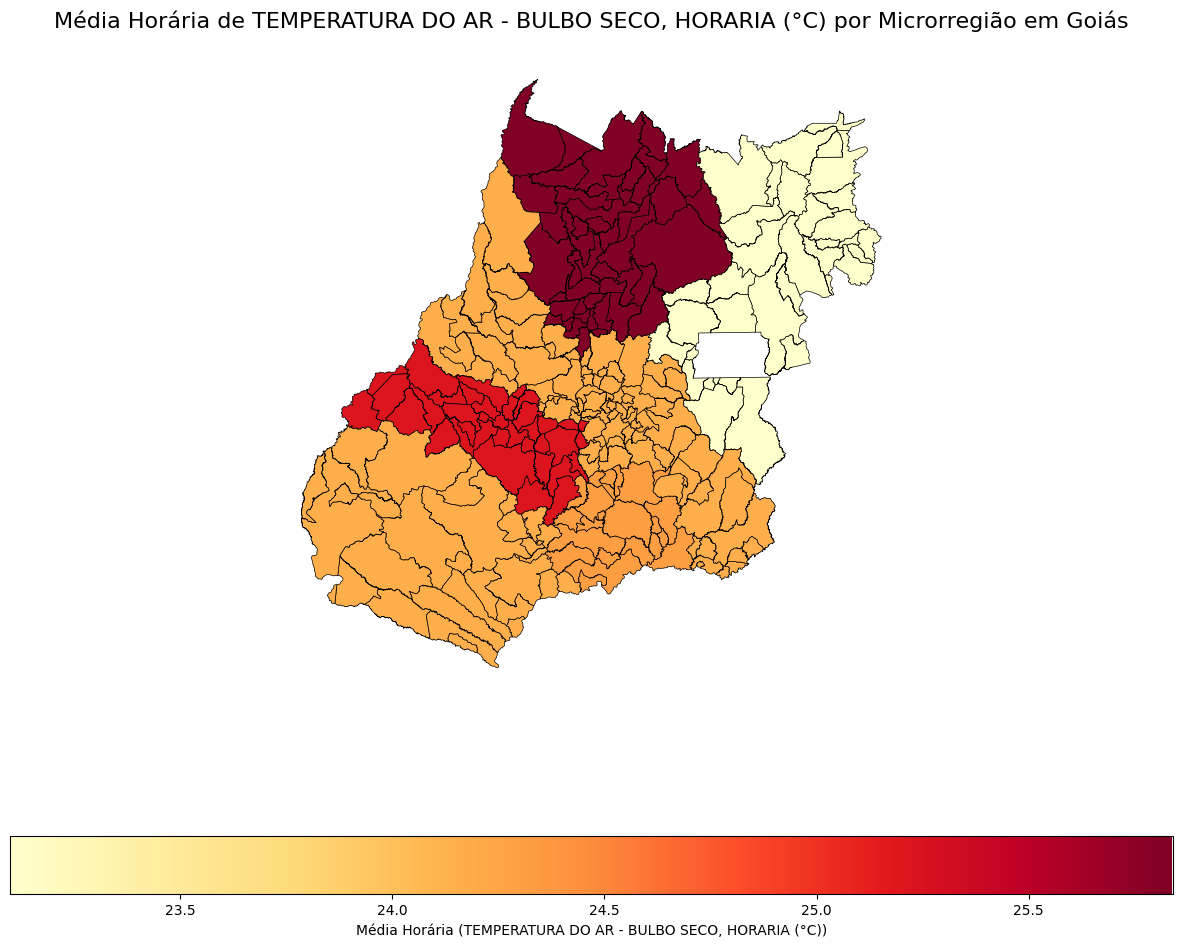

In [27]:
print("\n> Agregando dados climáticos por microrregião...")

# Identifica as colunas numéricas para agregação (excluindo as colunas de lat/lon adicionadas)
colunas_para_agregar = df_combinado_valid_coords.select_dtypes(include=['number']).columns.tolist()
print(f'\n Colunas para agregar {colunas_para_agregar}')

# Remove colunas de Lat/Lon da lista de agregação se estiverem presentes
colunas_para_agregar = [col for col in colunas_para_agregar if col not in ['Latitude_Estacao', 'Longitude_Estacao']]

if colunas_para_agregar:
    # Define as agregações (ex: média para a maioria, soma para precipitação)
    # Ajuste conforme as colunas e estatísticas de interesse do seu dataset INMET
    agg_dict = {col: 'mean' for col in colunas_para_agregar}
    # Exemplo específico para precipitação, se a coluna existir:
    # if 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)' in colunas_para_agregar:
          # agg_dict['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = 'sum'

    # Agregação pela coluna de identificação da microrregião ('CD_MUN' ou 'NM_MUN')
    # Substitua 'CD_MUN' pela coluna correta de identificação da microrregião em gdf_microrregioes
    coluna_id_microrregiao = 'CD_RGINT' # Use 'NM_MUN' se preferir agrupar por nome

    if coluna_id_microrregiao in gdf_join.columns:
          dados_climaticos_agregados = gdf_join.groupby(coluna_id_microrregiao)[colunas_para_agregar].mean() # Exemplo: usando média para todas as colunas numéricas
          # Se precisar de agregações mistas (mean, sum, etc.), use o dicionário agg_dict:
          # dados_climaticos_agregados = gdf_join.groupby(coluna_id_microrregiao).agg(agg_dict)

          # Juntar os dados agregados de volta ao GeoDataFrame das microrregiões
          gdf_microrregioes_com_clima = gdf_microrregioes.merge(dados_climaticos_agregados, on=coluna_id_microrregiao, how='left')

          print("\nDados climáticos agregados por microrregião (média das colunas numéricas):")
          display(gdf_microrregioes_com_clima.head())

          # --- PASSO 4: VISUALIZAR DADOS CLIMÁTICOS POR MICRORREGIÃO (OPCIONAL) ---
          print("\nExemplo de mapa com dados climáticos agregados (ex: Temperatura Média do Ar)...")
          # Substitua 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)' pela coluna agregada que deseja visualizar
          coluna_visualizar = 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)' # AJUSTE ESTA COLUNA

          if coluna_visualizar in gdf_microrregioes_com_clima.columns:
              fig, ax = plt.subplots(1, 1, figsize=(15, 12))
              gdf_microrregioes_com_clima.plot(column=coluna_visualizar,
                                                ax=ax,
                                                legend=True,
                                                cmap='YlOrRd', # Esquema de cores (Amarelo-Laranja-Vermelho)
                                                edgecolor='black',
                                                linewidth=0.5,
                                                legend_kwds={'label': f"Média Horária ({coluna_visualizar})", 'orientation': "horizontal"})
              ax.set_title(f'Média Horária de {coluna_visualizar} por Microrregião em Goiás', fontsize=16)
              ax.set_axis_off() # Remove os eixos
              plt.show()
          else:
              print(f"\nAviso: Coluna '{coluna_visualizar}' não encontrada no DataFrame agregado para visualização. Verifique os nomes das colunas após a agregação.")


    else:
          print(f"\nErro: Coluna de identificação da microrregião '{coluna_id_microrregiao}' não encontrada no GeoDataFrame resultante do Spatial Join.")


else:
    print("\nNenhuma coluna numérica encontrada para agregar no DataFrame de dados meteorológicos.")


In [28]:
import pandas as pd
import numpy as np

# --- ATENÇÃO: VERIFIQUE O NOME EXATO DO DATAFRAME E COLUNAS ---
# Certifique-se de que 'gdf_join' é o GeoDataFrame resultante do Spatial Join
# e que ele contém as colunas de dados climáticos relevantes e a coluna de ID da microrregião.
# As colunas de interesse provavelmente são:
# - 'RADIACAO GLOBAL (Kj/m²)' para recurso solar (AJUSTE O NOME DA COLUNA SE NECESSÁRIO)
# - 'VENTO, VELOCIDADE HORARIA (m/s)' para recurso eólico (AJUSTE O NOME DA COLUNA SE NECESSÁRIO)
# - A coluna de identificação da microrregião (ex: 'CD_MUN' ou 'NM_MUN')

if 'gdf_join' not in locals() or gdf_join.empty:
    print("Erro: O GeoDataFrame resultante do Spatial Join ('gdf_join') não foi encontrado ou está vazio.")
    print("Por favor, execute a célula do Spatial Join (anterior a esta) primeiro.")
else:
    print("Calculando atributos estatísticos para recursos solar e eólico por microrregião...")

    # --- Define as colunas de interesse e a coluna de agregação ---
    coluna_radiacao = 'RADIACAO GLOBAL (Kj/m²)' # VERIFIQUE E AJUSTE O NOME
    coluna_vento = 'VENTO, VELOCIDADE HORARIA (m/s)' # VERIFIQUE E AJUSTE O NOME
    coluna_id_microrregiao = 'CD_RGINT' # VERIFIQUE E AJUSTE PARA A COLUNA CORRETA DE ID DA MICRORREGIÃO

    # Lista para armazenar os DataFrames de atributos calculados
    lista_atributos = []

    # --- Processar Recurso Solar (Radiação Global) ---
    if coluna_radiacao in gdf_join.columns:
        print(f"\nProcessando recurso solar ('{coluna_radiacao}')...")

        # Converter a coluna de radiação para numérica (se ainda não estiver)
        gdf_join[coluna_radiacao] = pd.to_numeric(gdf_join[coluna_radiacao], errors='coerce')

        # Remover NaNs na coluna de interesse antes de calcular as métricas para evitar erros
        df_solar = gdf_join.dropna(subset=[coluna_radiacao, coluna_id_microrregiao]).copy()

        if not df_solar.empty:
             # Definir a coluna de data/hora como índice temporal
             # ATENÇÃO: A coluna de data/hora precisa ser convertida para datetime primeiro.
             # Assumindo que 'Data' e 'Hora UTC' existem e foram combinadas/convertidas em uma coluna 'datetime'
             # Se não, você precisará criar a coluna 'datetime' primeiro.
             try:
                 df_solar['Data'] = pd.to_datetime(df_solar['Data'])
                 # Se a hora estiver separada e precisar ser combinada:
                 # df_solar['datetime'] = pd.to_datetime(df_solar['Data'] + ' ' + df_solar['Hora UTC'], format='%Y/%m/%d %H:%M')
                 df_solar.set_index('Data', inplace=True) # Usar a coluna de data como índice temporal

                 # Calcular a média diária do recurso solar para cada estação/ponto
                 df_solar_diario = df_solar.groupby([coluna_id_microrregiao, df_solar.index.date])[coluna_radiacao].mean().reset_index()
                 df_solar_diario.rename(columns={'level_1': 'Data'}, inplace=True) # Renomeia a coluna de data criada pelo groupby

                 # --- Métricas Anuais (baseadas na média diária) ---
                 print("  -> Calculando métricas anuais...")
                 atributos_anual_solar = df_solar_diario.groupby(coluna_id_microrregiao)[coluna_radiacao].agg(['mean', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]).reset_index()
                 atributos_anual_solar.columns = [coluna_id_microrregiao, 'solar_mean_diaria_anual', 'solar_median_diaria_anual', 'solar_p25_diaria_anual', 'solar_p75_diaria_anual']
                 lista_atributos.append(atributos_anual_solar)

                 # --- Métricas de Variabilidade (baseadas na média diária) ---
                 print("  -> Calculando métricas de variabilidade...")
                 atributos_variab_solar = df_solar_diario.groupby(coluna_id_microrregiao)[coluna_radiacao].agg(['std', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan]).reset_index()
                 atributos_variab_solar.columns = [coluna_id_microrregiao, 'solar_std_diaria', 'solar_coef_variacao_diaria']
                 lista_atributos.append(atributos_variab_solar)

                 # --- Métricas de Extremos (baseadas na média diária) ---
                 print("  -> Calculando métricas de extremos...")
                 atributos_extremos_solar = df_solar_diario.groupby(coluna_id_microrregiao)[coluna_radiacao].agg([lambda x: x.quantile(0.05), lambda x: x.quantile(0.95)]).reset_index()
                 atributos_extremos_solar.columns = [coluna_id_microrregiao, 'solar_p05_diaria', 'solar_p95_diaria']
                 lista_atributos.append(atributos_extremos_solar)

                 # --- Métricas Sazonais (baseadas na média horária) ---
                 print("  -> Calculando métricas sazonais...")
                 # Certifique-se de que o índice é datetime para resampling
                 df_solar.index = pd.to_datetime(df_solar.index)
                 atributos_sazonal_solar = df_solar.groupby(coluna_id_microrregiao)[coluna_radiacao].resample('QS').mean().reset_index() # 'QS' resample por trimestre (Quartely Start)
                 atributos_sazonal_solar['season'] = atributos_sazonal_solar['Data'].dt.quarter # Extrai o trimestre como indicador de estação
                 atributos_sazonal_solar = atributos_sazonal_solar.pivot(index=coluna_id_microrregiao, columns='season', values=coluna_radiacao).reset_index()
                 atributos_sazonal_solar.columns = [coluna_id_microrregiao, 'solar_mean_Q1', 'solar_mean_Q2', 'solar_mean_Q3', 'solar_mean_Q4'] # Renomear colunas para trimestres/estações

                 lista_atributos.append(atributos_sazonal_solar)


             except KeyError as e:
                 print(f"  -> Erro: Coluna de data/hora não encontrada ou com nome incorreto: {e}")
                 print("  -> Certifique-se de que uma coluna datetime foi criada e definida como índice temporal.")
             except Exception as e:
                  print(f"  -> Ocorreu um erro ao processar dados solares: {e}")


        else:
            print(f"  -> Nenhum dado válido encontrado para o recurso solar na coluna '{coluna_radiacao}'.")

    else:
        print(f"\nColunas de radiação solar ('{coluna_radiacao}') não encontrada no GeoDataFrame unido.")
        print("Por favor, verifique o nome da coluna no seu DataFrame de dados meteorológicos.")


    # --- Processar Recurso Eólico (Velocidade do Vento) ---
    if coluna_vento in gdf_join.columns:
        print(f"\nProcessando recurso eólico ('{coluna_vento}')...")

        # Converter a coluna de vento para numérica (se ainda não estiver)
        gdf_join[coluna_vento] = pd.to_numeric(gdf_join[coluna_vento], errors='coerce')

         # Remover NaNs na coluna de interesse antes de calcular as métricas para evitar erros
        df_vento = gdf_join.dropna(subset=[coluna_vento, coluna_id_microrregiao]).copy()

        if not df_vento.empty:
            # Definir a coluna de data/hora como índice temporal
             try:
                 df_vento['Data'] = pd.to_datetime(df_vento['Data'])
                 df_vento.set_index('Data', inplace=True) # Usar a coluna de data como índice temporal

                 # Calcular a média diária do recurso eólico para cada estação/ponto
                 df_vento_diario = df_vento.groupby([coluna_id_microrregiao, df_vento.index.date])[coluna_vento].mean().reset_index()
                 df_vento_diario.rename(columns={'level_1': 'Data'}, inplace=True)

                 # --- Métricas Anuais (baseadas na média diária) ---
                 print("  -> Calculando métricas anuais...")
                 atributos_anual_vento = df_vento_diario.groupby(coluna_id_microrregiao)[coluna_vento].agg(['mean', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]).reset_index()
                 atributos_anual_vento.columns = [coluna_id_microrregiao, 'vento_mean_diaria_anual', 'vento_median_diaria_anual', 'vento_p25_diaria_anual', 'vento_p75_diaria_anual']
                 lista_atributos.append(atributos_anual_vento)

                 # --- Métricas de Variabilidade (baseadas na média diária) ---
                 print("  -> Calculando métricas de variabilidade...")
                 atributos_variab_vento = df_vento_diario.groupby(coluna_id_microrregiao)[coluna_vento].agg(['std', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan]).reset_index()
                 atributos_variab_vento.columns = [coluna_id_microrregiao, 'vento_std_diaria', 'vento_coef_variacao_diaria']
                 lista_atributos.append(atributos_variab_vento)

                 # --- Métricas de Extremos (baseadas na média diária) ---
                 print("  -> Calculando métricas de extremos...")
                 atributos_extremos_vento = df_vento_diario.groupby(coluna_id_microrregiao)[coluna_vento].agg([lambda x: x.quantile(0.05), lambda x: x.quantile(0.95)]).reset_index()
                 atributos_extremos_vento.columns = [coluna_id_microrregiao, 'vento_p05_diaria', 'vento_p95_diaria']
                 lista_atributos.append(atributos_extremos_vento)

                 # --- Métricas Sazonais (baseadas na média horária) ---
                 print("  -> Calculando métricas sazonais...")
                 # Certifique-se de que o índice é datetime para resampling
                 df_vento.index = pd.to_datetime(df_vento.index)
                 atributos_sazonal_vento = df_vento.groupby(coluna_id_microrregiao)[coluna_vento].resample('QS').mean().reset_index() # 'QS' resample por trimestre (Quartely Start)
                 atributos_sazonal_vento['season'] = atributos_sazonal_vento['Data'].dt.quarter # Extrai o trimestre como indicador de estação
                 atributos_sazonal_vento = atributos_sazonal_vento.pivot(index=coluna_id_microrregiao, columns='season', values=coluna_vento).reset_index()
                 atributos_sazonal_vento.columns = [coluna_id_microrregiao, 'vento_mean_Q1', 'vento_mean_Q2', 'vento_mean_Q3', 'vento_mean_Q4'] # Renomear colunas para trimestres/estações

                 lista_atributos.append(atributos_sazonal_vento)

             except KeyError as e:
                 print(f"  -> Erro: Coluna de data/hora não encontrada ou com nome incorreto: {e}")
                 print("  -> Certifique-se de que uma coluna datetime foi criada e definida como índice temporal.")
             except Exception as e:
                  print(f"  -> Ocorreu um erro ao processar dados de vento: {e}")


        else:
            print(f"  -> Nenhum dado válido encontrado para o recurso eólico na coluna '{coluna_vento}'.")

    else:
        print(f"\nColunas de velocidade do vento ('{coluna_vento}') não encontrada no GeoDataFrame unido.")
        print("Por favor, verifique o nome da coluna no seu DataFrame de dados meteorológicos.")

    # --- Juntar todos os atributos calculados em um único DataFrame por microrregião ---
    if lista_atributos:
        print("\nCombinando todos os atributos calculados...")
        df_atributos_microrregiao = lista_atributos[0]
        for df_attr in lista_atributos[1:]:
            df_atributos_microrregiao = df_atributos_microrregiao.merge(df_attr, on=coluna_id_microrregiao, how='outer') # Usar 'outer' para manter todas as microrregiões

        print("\nDataFrame final com atributos climáticos por microrregião:")
        display(df_atributos_microrregiao.head())

        # --- Opcional: Juntar este DataFrame de atributos de volta ao GeoDataFrame das microrregiões ---
        # Isso permite visualizar os atributos no mapa
        if 'gdf_microrregioes' in locals():
            print("\nJuntando atributos climáticos ao GeoDataFrame das microrregiões...")
            gdf_microrregioes_com_atributos = gdf_microrregioes.merge(df_atributos_microrregiao, on=coluna_id_microrregiao, how='left')
            print("GeoDataFrame de microrregiões com atributos climáticos:")
            display(gdf_microrregioes_com_atributos.head())
        else:
            print("\nErro: GeoDataFrame de microrregiões (gdf_microrregioes) não encontrado. Não foi possível juntar os atributos.")


    else:
        print("\nNenhum atributo foi calculado. Verifique se as colunas de radiação e vento foram encontradas.")

Calculando atributos estatísticos para recursos solar e eólico por microrregião...

Processando recurso solar ('RADIACAO GLOBAL (Kj/m²)')...
  -> Calculando métricas anuais...
  -> Calculando métricas de variabilidade...
  -> Calculando métricas de extremos...
  -> Calculando métricas sazonais...

Processando recurso eólico ('VENTO, VELOCIDADE HORARIA (m/s)')...
  -> Calculando métricas anuais...
  -> Calculando métricas de variabilidade...
  -> Calculando métricas de extremos...
  -> Calculando métricas sazonais...

Combinando todos os atributos calculados...

DataFrame final com atributos climáticos por microrregião:


,CD_RGINT,solar_mean_diaria_anual,solar_median_diaria_anual,solar_p25_diaria_anual,solar_p75_diaria_anual,solar_std_diaria,solar_coef_variacao_diaria,solar_p05_diaria,solar_p95_diaria,solar_mean_Q1,...,vento_p25_diaria_anual,vento_p75_diaria_anual,vento_std_diaria,vento_coef_variacao_diaria,vento_p05_diaria,vento_p95_diaria,vento_mean_Q1,vento_mean_Q2,vento_mean_Q3,vento_mean_Q4
0,5201,1189.055007,1194.579140,1128.969396,1271.469140,132.647841,0.111557,932.871799,1387.443082,1181.516125,...,0.989375,1.354617,0.353682,0.289094,0.764792,1.882917,1.127930,1.097373,1.463537,1.202418
1,5202,1158.552845,1140.365307,1027.382495,1349.449124,223.009079,0.192489,767.943152,1491.806457,1132.823568,...,1.284122,1.840160,0.503691,0.313990,0.942019,2.517033,1.436953,1.554577,1.704938,1.717822
2,5203,1316.725828,1349.053435,1261.739048,1406.247268,142.603482,0.108302,1041.540694,1485.296819,1327.429898,...,1.360889,1.698423,0.295055,0.188240,1.190275,2.089518,1.587766,1.434473,1.618596,1.627718
3,5204,1365.059095,1375.642835,1308.601451,1439.423725,129.587049,0.094931,1109.765169,1573.391132,1417.035559,...,1.211683,1.515435,0.274456,0.196674,1.038721,1.898300,1.325209,1.356600,1.463506,1.435448
4,5205,1228.268832,1207.006336,1156.885483,1310.058278,153.338545,0.124841,961.439129,1493.486265,1318.932423,...,1.176411,1.561750,0.320765,0.229504,0.983963,1.944454,1.313437,1.203259,1.608951,1.461894



Juntando atributos climáticos ao GeoDataFrame das microrregiões...
GeoDataFrame de microrregiões com atributos climáticos:


,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,...,vento_p25_diaria_anual,vento_p75_diaria_anual,vento_std_diaria,vento_coef_variacao_diaria,vento_p05_diaria,vento_p95_diaria,vento_mean_Q1,vento_mean_Q2,vento_mean_Q3,vento_mean_Q4
0,5219902,São Francisco de Goiás,520002,Anápolis,5201,Goiânia,52,Goiás,GO,5,...,0.989375,1.354617,0.353682,0.289094,0.764792,1.882917,1.127930,1.097373,1.463537,1.202418
1,5215652,Palestina de Goiás,520014,Iporá,5204,São Luís de Montes Belos - Iporá,52,Goiás,GO,5,...,1.211683,1.515435,0.274456,0.196674,1.038721,1.898300,1.325209,1.356600,1.463506,1.435448
2,5208400,Goianápolis,520002,Anápolis,5201,Goiânia,52,Goiás,GO,5,...,0.989375,1.354617,0.353682,0.289094,0.764792,1.882917,1.127930,1.097373,1.463537,1.202418
3,5207105,Diorama,520014,Iporá,5204,São Luís de Montes Belos - Iporá,52,Goiás,GO,5,...,1.211683,1.515435,0.274456,0.196674,1.038721,1.898300,1.325209,1.356600,1.463506,1.435448
4,5218607,Rialma,520018,Ceres - Rialma - Goianésia,5205,Porangatu - Uruaçu,52,Goiás,GO,5,...,1.176411,1.561750,0.320765,0.229504,0.983963,1.944454,1.313437,1.203259,1.608951,1.461894


In [29]:
import pandas as pd
import geopandas as gpd

# --- PASSO 1: INTEGRAR COM DADOS DE USINAS DE ENERGIA ---
# Juntar gdf_microrregioes_com_atributos com gdf_usinas_goias

print("Integrando dados de usinas de energia...")

# Verificar se os GeoDataFrames necessários existem
if 'gdf_microrregioes_com_atributos' in locals() and 'gdf_usinas_goias' in locals():
    # Para juntar, precisamos garantir que ambos os GeoDataFrames estejam no mesmo CRS.
    # gdf_microrregioes_com_atributos já está em EPSG:31983 (do passo anterior de cálculo de área/centroide).
    # gdf_usinas_goias foi criado em EPSG:4326. Precisamos reprojetar gdf_usinas_goias.
    if gdf_usinas_goias.crs != gdf_microrregioes_com_atributos.crs:
        print(f"Reprojetando GeoDataFrame de usinas de {gdf_usinas_goias.crs.to_epsg()} para o CRS das microrregiões ({gdf_microrregioes_com_atributos.crs.to_epsg()}).")
        gdf_usinas_goias = gdf_usinas_goias.to_crs(gdf_microrregioes_com_atributos.crs)


    # Realizar a junção espacial para associar cada usina à sua microrregião
    # Usamos 'within' para juntar as usinas que caem dentro dos polígonos das microrregiões
    # O 'how="left"' garante que todas as microrregiões sejam mantidas, mesmo aquelas sem usinas
    gdf_microrregioes_com_usinas = gpd.sjoin(gdf_microrregioes_com_atributos, gdf_usinas_goias, how="left", predicate="contains")

    print(f"\nSpatial Join com usinas concluído. {len(gdf_microrregioes_com_usinas)} registros no GeoDataFrame resultante (pode haver duplicações se uma microrregião tiver múltiplas usinas).")
    print("Amostra do GeoDataFrame com dados de usinas:")
    display(gdf_microrregioes_com_usinas.head())

    # Para uma análise mais limpa por microrregião, talvez você queira agregar as usinas
    # (ex: contar o número de usinas por microrregião, somar a potência instalada, etc.)
    print("\nSugestão: Agregando dados de usinas por microrregião (ex: contagem de usinas)...")
    # Exemplo: Contar o número de usinas por microrregião
    contagem_usinas_por_microrregiao = gdf_microrregioes_com_usinas.groupby('CD_RGINT').size().reset_index(name='num_usinas')
    print("\nContagem de usinas por microrregião:")
    display(contagem_usinas_por_microrregiao.head())

    # Exemplo: Somar a potência fiscalizada por microrregião
    # ATENÇÃO: Certifique-se de que 'MdaPotenciaFiscalizadaKw' é numérica e limpa de vírgulas antes de somar!
    # Pode ser necessário limpar e converter esta coluna antes desta agregação.
    # Se esta coluna ainda tiver vírgulas, use:
    # gdf_usinas_goias['MdaPotenciaFiscalizadaKw_num'] = gdf_usinas_goias['MdaPotenciaFiscalizadaKw'].str.replace(',', '.', regex=False).astype(float)
    # E então use 'MdaPotenciaFiscalizadaKw_num' na agregação abaixo.

    # Vamos tentar converter e somar diretamente, tratando erros:
    gdf_microrregioes_com_usinas['MdaPotenciaFiscalizadaKw_num'] = pd.to_numeric(
        gdf_microrregioes_com_usinas['MdaPotenciaFiscalizadaKw'].astype(str).str.replace(',', '.', regex=False),
        errors='coerce'
    )
    potencia_por_microrregiao = gdf_microrregioes_com_usinas.groupby('CD_RGINT')['MdaPotenciaFiscalizadaKw_num'].sum().reset_index(name='potencia_fiscalizada_kw')
    print("\nPotência fiscalizada (kW) por microrregião:")
    display(potencia_por_microrregiao.head())

    # Você pode juntar essas agregações de volta ao GeoDataFrame principal, se desejar.
    gdf_microrregioes_final = gdf_microrregioes_com_atributos.merge(contagem_usinas_por_microrregiao, on='CD_RGINT', how='left')
    gdf_microrregioes_final = gdf_microrregioes_final.merge(potencia_por_microrregiao, on='CD_RGINT', how='left')
    print("\nGeoDataFrame com contagem e potência de usinas por microrregião:")
    display(gdf_microrregioes_final.head())


else:
    print("Erro: GeoDataFrames 'gdf_microrregioes_com_atributos' ou 'gdf_usinas_goias' não encontrados.")
    print("Por favor, execute as células anteriores para criar estes GeoDataFrames.")


# --- PASSO 2: INTEGRAR COM DADOS DE PIB ---
# Juntar gdf_microrregioes_final (ou gdf_microrregioes_com_atributos) com df_pib_final

print("\n\nIntegrando dados de PIB...")

# Verificar se os DataFrames/GeoDataFrames necessários existem
if 'gdf_microrregioes_final' in locals() and 'df_pib_final' in locals():
    # Realiza a junção (merge) usando a coluna que identifica a microrregião/município
    # df_pib_final tem 'NM_MUN' e 'pib_mil_reais'.
    # gdf_microrregioes_final (ou gdf_microrregioes_com_atributos) tem 'CD_MUN' e 'NM_MUN'.
    # Podemos juntar usando 'NM_MUN'.

    # É crucial verificar se os nomes dos municípios ('NM_MUN') coincidem nos dois DataFrames.
    # O passo de processamento do PIB já mostrou que 'São Luís de Montes Belos' não encontrou correspondente.
    # Precisamos usar o GeoDataFrame que tem o nome do município para o merge.
    # Se você usou 'CD_MUN' para agregar o clima, pode ser necessário juntar o PIB primeiro ao GeoDataFrame base das microrregiões.

    # Vamos juntar o PIB ao gdf_microrregioes_final (que já tem os atributos climáticos e de usinas agregados)
    # usando 'NM_MUN'.
    gdf_microrregioes_final_com_pib = gdf_microrregioes_final.merge(df_pib_final[['NM_MUN', 'pib_mil_reais']], on='NM_MUN', how='left')

    print("\nJunção com dados de PIB concluída.")
    print("Amostra do GeoDataFrame final com atributos climáticos, usinas agregadas e PIB:")
    display(gdf_microrregioes_final_com_pib.head())

    # Verificar se há microrregiões que não encontraram dados de PIB
    microrregioes_sem_pib_final = gdf_microrregioes_final_com_pib[gdf_microrregioes_final_com_pib['pib_mil_reais'].isnull()]
    if not microrregioes_sem_pib_final.empty:
        print(f"⚠️ Atenção: {len(microrregioes_sem_pib_final)} microrregiões (baseado no nome do município) não encontraram dados de PIB correspondentes após o merge. Isso pode ocorrer por nomes diferentes.")
        print(microrregioes_sem_pib_final['CD_RGINT'].tolist())

    # --- PASSO ADICIONAL: PREENCHER NaNs NOS ATRIBUTOS CLIMÁTICOS AGREGADOS ---
    # Preenche os NaNs nas colunas de atributos climáticos agregados com a média da coluna
    # Isso lida com microrregiões que não tiveram estações ou dados válidos para agregação
    print("\nPreenchendo NaNs nos atributos climáticos agregados com a média da coluna...")

    # Identifica as colunas de atributos climáticos (excluindo colunas de identificação e geometria)
    # Isso pode exigir um ajuste dependendo de quais colunas você quer preencher
    colunas_atributos_climaticos = [col for col in gdf_microrregioes_final_com_pib.columns if ('solar_' in col or 'vento_' in col or 'TEMPERATURA' in col or 'PRECIPITAÇÃO' in col or 'UMIDADE' in col or 'PRESSAO' in col) and col not in ['geometry', 'CD_MUN', 'NM_MUN', 'num_usinas', 'potencia_fiscalizada_kw', 'pib_mil_reais', 'index_right']]

    for coluna in colunas_atributos_climaticos:
        if gdf_microrregioes_final_com_pib[coluna].isnull().any():
            media_coluna = gdf_microrregioes_final_com_pib[coluna].mean()
            # Usar loc para evitar SettingWithCopyWarning e atribuir o resultado de volta à coluna
            gdf_microrregioes_final_com_pib.loc[:, coluna] = gdf_microrregioes_final_com_pib.loc[:, coluna].fillna(media_coluna)
            # print(f"  -> Coluna '{coluna}': NaN preenchido com a média ({media_coluna:.2f})") # Opcional: descomente para ver quais colunas foram preenchidas
        # else:
            # print(f"  -> Coluna '{coluna}': Nenhum NaN encontrado nos atributos agregados.") # Opcional

    print("Preenchimento de NaNs nos atributos climáticos agregados concluído.")
    print("\nAmostra do GeoDataFrame final após preenchimento de NaNs nos atributos climáticos:")
    display(gdf_microrregioes_final_com_pib.head())


else:
    print("Erro: GeoDataFrame 'gdf_microrregioes_final' ou DataFrame 'df_pib_final' não encontrados.")
    print("Por favor, execute as células anteriores para criar estes DataFrames.")

Integrando dados de usinas de energia...
Reprojetando GeoDataFrame de usinas de 4326 para o CRS das microrregiões (31983).

Spatial Join com usinas concluído. 453 registros no GeoDataFrame resultante (pode haver duplicações se uma microrregião tiver múltiplas usinas).
Amostra do GeoDataFrame com dados de usinas:


,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,...,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios,Latitude,Longitude
0,5219902,São Francisco de Goiás,520002,Anápolis,5201,Goiânia,52,Goiás,GO,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5215652,Palestina de Goiás,520014,Iporá,5204,São Luís de Montes Belos - Iporá,52,Goiás,GO,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5208400,Goianápolis,520002,Anápolis,5201,Goiânia,52,Goiás,GO,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5207105,Diorama,520014,Iporá,5204,São Luís de Montes Belos - Iporá,52,Goiás,GO,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5218607,Rialma,520018,Ceres - Rialma - Goianésia,5205,Porangatu - Uruaçu,52,Goiás,GO,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Sugestão: Agregando dados de usinas por microrregião (ex: contagem de usinas)...

Contagem de usinas por microrregião:


,CD_RGINT,num_usinas
0,5201,134
1,5202,33
2,5203,78
3,5204,55
4,5205,92



Potência fiscalizada (kW) por microrregião:


,CD_RGINT,potencia_fiscalizada_kw
0,5201,465149.0
1,5202,648802.0
2,5203,3236105.0
3,5204,498087.0
4,5205,1524310.0



GeoDataFrame com contagem e potência de usinas por microrregião:


,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,...,vento_std_diaria,vento_coef_variacao_diaria,vento_p05_diaria,vento_p95_diaria,vento_mean_Q1,vento_mean_Q2,vento_mean_Q3,vento_mean_Q4,num_usinas,potencia_fiscalizada_kw
0,5219902,São Francisco de Goiás,520002,Anápolis,5201,Goiânia,52,Goiás,GO,5,...,0.353682,0.289094,0.764792,1.882917,1.127930,1.097373,1.463537,1.202418,134,465149.0
1,5215652,Palestina de Goiás,520014,Iporá,5204,São Luís de Montes Belos - Iporá,52,Goiás,GO,5,...,0.274456,0.196674,1.038721,1.898300,1.325209,1.356600,1.463506,1.435448,55,498087.0
2,5208400,Goianápolis,520002,Anápolis,5201,Goiânia,52,Goiás,GO,5,...,0.353682,0.289094,0.764792,1.882917,1.127930,1.097373,1.463537,1.202418,134,465149.0
3,5207105,Diorama,520014,Iporá,5204,São Luís de Montes Belos - Iporá,52,Goiás,GO,5,...,0.274456,0.196674,1.038721,1.898300,1.325209,1.356600,1.463506,1.435448,55,498087.0
4,5218607,Rialma,520018,Ceres - Rialma - Goianésia,5205,Porangatu - Uruaçu,52,Goiás,GO,5,...,0.320765,0.229504,0.983963,1.944454,1.313437,1.203259,1.608951,1.461894,92,1524310.0




Integrando dados de PIB...

Junção com dados de PIB concluída.
Amostra do GeoDataFrame final com atributos climáticos, usinas agregadas e PIB:


,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,...,vento_coef_variacao_diaria,vento_p05_diaria,vento_p95_diaria,vento_mean_Q1,vento_mean_Q2,vento_mean_Q3,vento_mean_Q4,num_usinas,potencia_fiscalizada_kw,pib_mil_reais
0,5219902,São Francisco de Goiás,520002,Anápolis,5201,Goiânia,52,Goiás,GO,5,...,0.289094,0.764792,1.882917,1.127930,1.097373,1.463537,1.202418,134,465149.0,130583.0
1,5215652,Palestina de Goiás,520014,Iporá,5204,São Luís de Montes Belos - Iporá,52,Goiás,GO,5,...,0.196674,1.038721,1.898300,1.325209,1.356600,1.463506,1.435448,55,498087.0,173192.0
2,5208400,Goianápolis,520002,Anápolis,5201,Goiânia,52,Goiás,GO,5,...,0.289094,0.764792,1.882917,1.127930,1.097373,1.463537,1.202418,134,465149.0,294381.0
3,5207105,Diorama,520014,Iporá,5204,São Luís de Montes Belos - Iporá,52,Goiás,GO,5,...,0.196674,1.038721,1.898300,1.325209,1.356600,1.463506,1.435448,55,498087.0,96842.0
4,5218607,Rialma,520018,Ceres - Rialma - Goianésia,5205,Porangatu - Uruaçu,52,Goiás,GO,5,...,0.229504,0.983963,1.944454,1.313437,1.203259,1.608951,1.461894,92,1524310.0,314485.0


⚠️ Atenção: 1 microrregiões (baseado no nome do município) não encontraram dados de PIB correspondentes após o merge. Isso pode ocorrer por nomes diferentes.
['5204']

Preenchendo NaNs nos atributos climáticos agregados com a média da coluna...
Preenchimento de NaNs nos atributos climáticos agregados concluído.

Amostra do GeoDataFrame final após preenchimento de NaNs nos atributos climáticos:


,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,...,vento_coef_variacao_diaria,vento_p05_diaria,vento_p95_diaria,vento_mean_Q1,vento_mean_Q2,vento_mean_Q3,vento_mean_Q4,num_usinas,potencia_fiscalizada_kw,pib_mil_reais
0,5219902,São Francisco de Goiás,520002,Anápolis,5201,Goiânia,52,Goiás,GO,5,...,0.289094,0.764792,1.882917,1.127930,1.097373,1.463537,1.202418,134,465149.0,130583.0
1,5215652,Palestina de Goiás,520014,Iporá,5204,São Luís de Montes Belos - Iporá,52,Goiás,GO,5,...,0.196674,1.038721,1.898300,1.325209,1.356600,1.463506,1.435448,55,498087.0,173192.0
2,5208400,Goianápolis,520002,Anápolis,5201,Goiânia,52,Goiás,GO,5,...,0.289094,0.764792,1.882917,1.127930,1.097373,1.463537,1.202418,134,465149.0,294381.0
3,5207105,Diorama,520014,Iporá,5204,São Luís de Montes Belos - Iporá,52,Goiás,GO,5,...,0.196674,1.038721,1.898300,1.325209,1.356600,1.463506,1.435448,55,498087.0,96842.0
4,5218607,Rialma,520018,Ceres - Rialma - Goianésia,5205,Porangatu - Uruaçu,52,Goiás,GO,5,...,0.229504,0.983963,1.944454,1.313437,1.203259,1.608951,1.461894,92,1524310.0,314485.0


# Linhas de estação

In [30]:
!pip install shapely haversine

## Carregar arquivo

In [31]:
linhas_est_file = '/content/drive/MyDrive/ESTUDOS/POS-IA-IFG/TRABALHO-FINAL-MODULO-II/ONS-LINHAS-DE-TRANSMISSAO-REDE-DE-OPERACAO/LINHA_TRANSMISSAO.csv'

linhas_estacao = pd.read_csv(
        linhas_est_file,
        sep=';',
        encoding='latin-1',
        decimal=','
    )

display(linhas_estacao)


,id_subsistema_terminalde,nom_subsistema_terminalde,id_subsistema_terminalpara,nom_subsistema_terminalpara,id_estado_terminalde,nom_estado_de,id_estado_terminalpara,nom_estado_para,nom_subestacao_de,nom_subestacao_para,...,val_capacidadeoperveraodialonga,val_capacidadeoperveraonoitelonga,val_capacoperinvernodialonga,val_capacoperinvernonoitelonga,val_capacoperveradiacurta,val_capacoperveraonoitecurta,val_capacoperinvernodiacurta,val_capacoperinvernonoitecurta,num_barra_de,num_barra_para
0,SE,SUDESTE,SE,SUDESTE,AC,ACRE,AC,ACRE,CRUZEIRO SUL,FEIJO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6990.0,6980.0
1,SE,SUDESTE,SE,SUDESTE,AC,ACRE,AC,ACRE,FEIJO,RIO BRANCO I,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6980.0,6950.0
2,SE,SUDESTE,SE,SUDESTE,AC,ACRE,AC,ACRE,RIO BRANCO I,TUCUMA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6950.0,7031.0
3,NE,NORDESTE,NE,NORDESTE,AL,ALAGOAS,AL,ALAGOAS,ARAPIRACA III,PENEDO,...,631.0,663.0,631.0,663.0,795.0,869.0,795.0,825.0,6081.0,5291.0
4,NE,NORDESTE,NE,NORDESTE,AL,ALAGOAS,AL,ALAGOAS,ARAPIRACA III,RIO LARGO II,...,631.0,663.0,631.0,663.0,795.0,870.0,795.0,824.0,6081.0,5111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312,SE,SUDESTE,SE,SUDESTE,SP,SAO PAULO,SP,SAO PAULO,ITABERA,TIJUCO PRETO,...,3119.0,3587.0,3311.0,3755.0,3930.0,4085.0,4113.0,4396.0,72.0,76.0
2313,N,NORTE,SE,SUDESTE,PA,PARA,MG,MINAS GERAIS,XINGU,ESTREITO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95473.0,93385.0
2314,N,NORTE,SE,SUDESTE,PA,PARA,MG,MINAS GERAIS,XINGU,ESTREITO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95473.0,93385.0
2315,N,NORTE,SE,SUDESTE,PA,PARA,RJ,RIO DE JANEIRO,XINGU,TERMINAL RIO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95473.0,95827.0


## Processar atributos

In [32]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import nearest_points
from haversine import haversine, Unit

# --- PASSO 1: CARREGAR OS DADOS ---

# Carregue os shapefiles e o CSV. Ajuste os caminhos conforme necessário.
try:
    # 1.1. Microrregiões
    gdf_microrregioes = gdf_microrregioes

    # 1.2. Subestações (assumindo que você tem um shapefile)
    gdf_subestacoes = gpd.read_file('caminho/para/seu/shapefile_subestacoes.shp')

    # 1.3. Linhas de Transmissão (assumindo que você tem um shapefile)
    gdf_linhas = gpd.read_file('caminho/para/seu/shapefile_linhas_transmissao.shp')

    # 1.4. Usinas de Geração (CSV da ANEEL)
    df_usinas = pd.read_csv('caminho/para/seu/siga-empreendimentos-geracao.csv', encoding='latin-1', sep=';')

except FileNotFoundError as e:
    print(f"Erro: Arquivo não encontrado. Verifique o caminho: {e}")
    # Encerre o script ou lide com o erro como preferir
    exit()


# --- PASSO 2: PRÉ-PROCESSAMENTO DOS DADOS ---

# 2.1. Garantir que todos os GeoDataFrames usem o mesmo sistema de coordenadas (CRS)
# WGS84 (EPSG:4326) é o padrão para dados de latitude/longitude.
gdf_microrregioes = gdf_microrregioes.to_crs(epsg=4326)
gdf_subestacoes = gdf_subestacoes.to_crs(epsg=4326)
gdf_linhas = gdf_linhas.to_crs(epsg=4326)

# 2.2. Filtrar subestações de alta tensão (>= 230 kV)
# A coluna de tensão pode ter nomes diferentes, como 'TENSAO_KV', 'NIVEL_TENSAO', etc.
# Ajuste o nome da coluna e o valor conforme seu arquivo de subestações.
gdf_subestacoes_alta = gdf_subestacoes[gdf_subestacoes['TENSAO_KV'] >= 230]

# 2.3. Criar um GeoDataFrame para as usinas a partir do CSV
# O CSV da ANEEL usa ',' como separador decimal.
df_usinas['mda_potencia_outorgada_mw'] = df_usinas['mda_potencia_outorgada_mw'].str.replace(',', '.').astype(float)
geometry_usinas = [Point(xy) for xy in zip(df_usinas['mda_longitude_dec'], df_usinas['mda_latitude_dec'])]
gdf_usinas = gpd.GeoDataFrame(df_usinas, geometry=geometry_usinas, crs="EPSG:4326")

# 2.4. Calcular o centroide de cada microrregião
gdf_microrregioes['centroide'] = gdf_microrregioes.geometry.centroid


# --- PASSO 3: CÁLCULO DAS MÉTRICAS POR MICRORREGIÃO ---

resultados = []

for index, microrregiao in gdf_microrregioes.iterrows():
    nome_microrregiao = microrregiao['NM_MICRO'] # Ajuste se o nome da coluna for diferente
    centroide = microrregiao['centroide']

    # 3.1. dist_subestacao_km
    distancias_subestacoes = [haversine((centroide.y, centroide.x), (sub.y, sub.x), unit=Unit.KILOMETERS) for sub in gdf_subestacoes_alta.geometry]
    dist_subestacao_km = min(distancias_subestacoes) if distancias_subestacoes else None

    # 3.2. dist_linha_transmissao_km
    # Encontra o ponto mais próximo em cada linha de transmissão ao centroide
    pontos_proximos = [nearest_points(centroide, linha)[1] for linha in gdf_linhas.geometry]
    distancias_linhas = [haversine((centroide.y, centroide.x), (ponto.y, ponto.x), unit=Unit.KILOMETERS) for ponto in pontos_proximos]
    dist_linha_transmissao_km = min(distancias_linhas) if distancias_linhas else None

    # 3.3. cap_hidreletrica_existente_MW e cap_renovavel_existente_MW
    # Identificar usinas dentro do polígono da microrregião
    usinas_na_microrregiao = gpd.sjoin(gdf_usinas, microrregiao.to_frame().T, how="inner", predicate="within")

    # Somar a capacidade por tipo de usina
    cap_hidreletrica = usinas_na_microrregiao[usinas_na_microrregiao['dsc_tipo_geracao'] == 'Hidrelétrica']['mda_potencia_outorgada_mw'].sum()

    tipos_renovaveis = ['Fotovoltaica', 'Eólica']
    cap_renovavel = usinas_na_microrregiao[usinas_na_microrregiao['dsc_tipo_geracao'].isin(tipos_renovaveis)]['mda_potencia_outorgada_mw'].sum()

    resultados.append({
        'microrregiao': nome_microrregiao,
        'dist_subestacao_km': dist_subestacao_km,
        'dist_linha_transmissao_km': dist_linha_transmissao_km,
        'cap_hidreletrica_existente_MW': cap_hidreletrica,
        'cap_renovavel_existente_MW': cap_renovavel
    })

# --- PASSO 4: CRIAR O DATAFRAME FINAL ---

df_final = pd.DataFrame(resultados)

# Exibir os resultados
print("Resultados dos Cálculos:")
print(df_final.head())

# Opcional: Salvar os resultados em um CSV
df_final.to_csv('resultados_infraestrutura_eletrica.csv', index=False)

print("\nCálculos concluídos e salvos em 'resultados_infraestrutura_eletrica.csv'")

DataSourceError: caminho/para/seu/shapefile_subestacoes.shp: No such file or directory

Calculando Potencial Solar por microrregião...

Potencial Solar calculado por microrregião.

Amostra do GeoDataFrame com o novo atributo 'potencial_solar_gwh_ano':


,NM_MUN,irradiacao_media_anual_kwh_m2_ano,area_disponivel_m2,potencial_solar_gwh_ano
0,São Francisco de Goiás,103.660377,4.183448e+06,69.385245
1,Palestina de Goiás,119.004200,1.332478e+07,253.712787
2,Goianápolis,103.660377,1.672867e+06,27.745610
3,Diorama,119.004200,6.927004e+06,131.894813
4,Rialma,107.078991,2.696515e+06,46.198415



Visualizando Potencial Solar por microrregião...


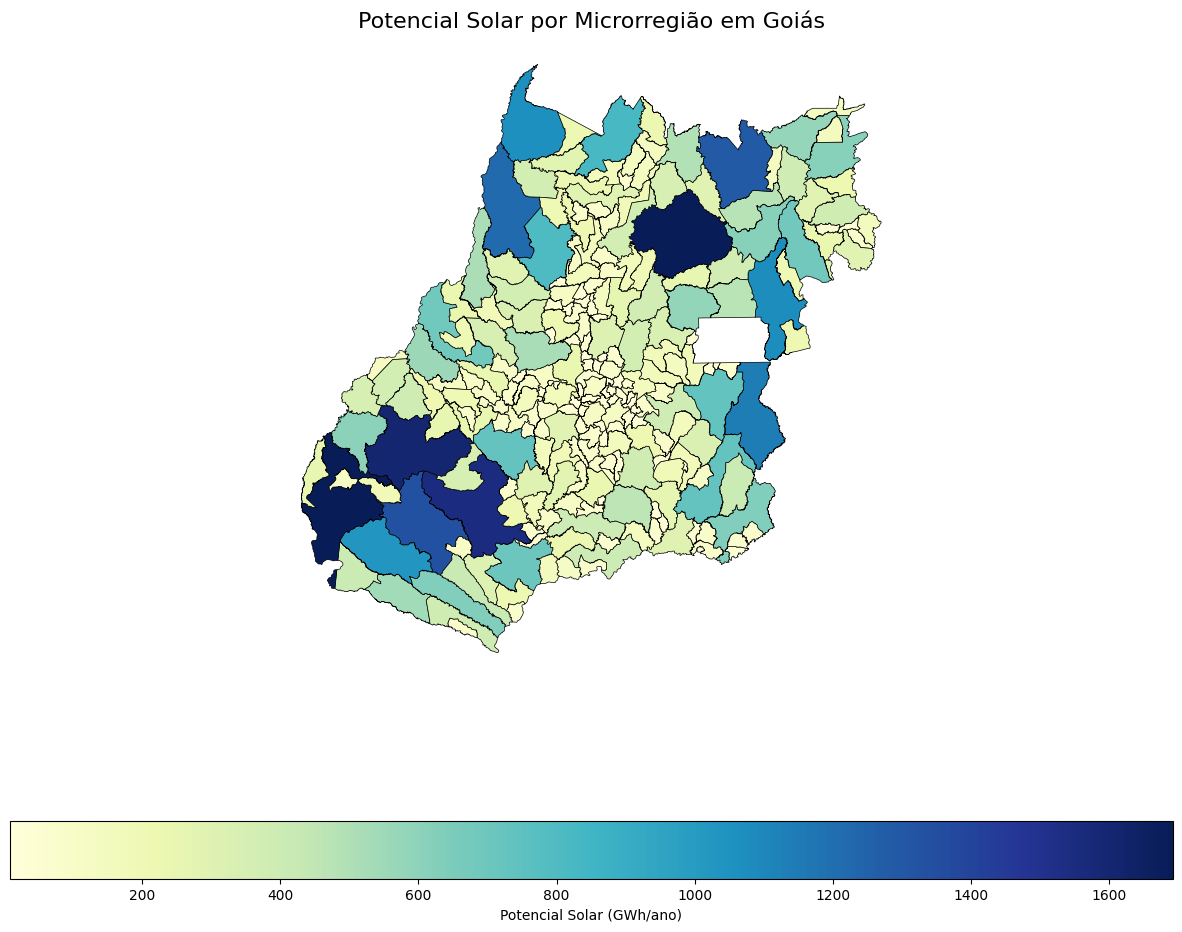

In [34]:
import pandas as pd
import numpy as np

# Verificar se o GeoDataFrame com atributos climáticos agregados existe
if 'gdf_microrregioes_com_atributos' in locals() and not gdf_microrregioes_com_atributos.empty:
    print("Calculando Potencial Solar por microrregião...")

    # Definir os parâmetros para o cálculo do potencial solar
    eficiencia_painel = 0.20  # Exemplo: 20% de eficiência do painel
    performance_ratio = 0.80  # Exemplo: 80% de Performance Ratio

    # Assumir uma fração da área total para a área disponível (AJUSTE CONFORME NECESSÁRIO)
    # Por exemplo, 1% da área total da microrregião é considerada disponível para painéis solares
    fracao_area_disponivel = 0.01

    # Nome da coluna de radiação global agregada no GeoDataFrame
    coluna_radiacao_agregada = 'solar_mean_diaria_anual' # VERIFIQUE O NOME DA COLUNA CORRETA

    # Verificar se a coluna de radiação global agregada existe
    if coluna_radiacao_agregada in gdf_microrregioes_com_atributos.columns:

        # Converter a radiação média diária anual de Kj/m²/dia para kWh/m²/ano
        # 1 Kj = 0.000238846 kWh
        # Multiplicar por 365 para obter o valor anual
        gdf_microrregioes_com_atributos['irradiacao_media_anual_kwh_m2_ano'] = (
            gdf_microrregioes_com_atributos[coluna_radiacao_agregada] * 0.000238846 * 365
        )

        # Calcular a Área Disponível em m² (Area_km2 já deve estar em km²)
        # 1 km² = 1,000,000 m²
        gdf_microrregioes_com_atributos['area_disponivel_m2'] = (
            gdf_microrregioes_com_atributos['area_km2'] * 1_000_000 * fracao_area_disponivel
        )


        # Calcular o Potencial Solar (GWh/ano)
        # (kWh/m²/ano) * (m²) * (eficiência) * (PR) / 1,000,000 (para converter kWh para GWh)
        gdf_microrregioes_com_atributos['potencial_solar_gwh_ano'] = (
            gdf_microrregioes_com_atributos['irradiacao_media_anual_kwh_m2_ano'] *
            gdf_microrregioes_com_atributos['area_disponivel_m2'] *
            eficiencia_painel *
            performance_ratio / 1_000_000
        )

        print("\nPotencial Solar calculado por microrregião.")
        print("\nAmostra do GeoDataFrame com o novo atributo 'potencial_solar_gwh_ano':")
        display(gdf_microrregioes_com_atributos[['NM_MUN', 'irradiacao_media_anual_kwh_m2_ano', 'area_disponivel_m2', 'potencial_solar_gwh_ano']].head())

        # Opcional: Visualizar o Potencial Solar no mapa
        print("\nVisualizando Potencial Solar por microrregião...")
        fig, ax = plt.subplots(1, 1, figsize=(15, 12))
        gdf_microrregioes_com_atributos.plot(column='potencial_solar_gwh_ano',
                                            ax=ax,
                                            legend=True,
                                            cmap='YlGnBu', # Esquema de cores (Amarelo-Verde-Azul)
                                            edgecolor='black',
                                            linewidth=0.5,
                                            legend_kwds={'label': "Potencial Solar (GWh/ano)", 'orientation': "horizontal"})
        ax.set_title('Potencial Solar por Microrregião em Goiás', fontsize=16)
        ax.set_axis_off()
        plt.show()


    else:
        print(f"Erro: Coluna de radiação global agregada '{coluna_radiacao_agregada}' não encontrada no GeoDataFrame.")
        print("Verifique se a agregação dos dados climáticos foi bem sucedida e o nome da coluna.")

else:
    print("Erro: GeoDataFrame 'gdf_microrregioes_com_atributos' não encontrado ou está vazio.")
    print("Por favor, execute as células anteriores para criar este GeoDataFrame.")

# Task
Calculate the solar potential for each microregion based on the provided formula, using the aggregated data for average annual irradiation and available area. Apply the given efficiency and performance ratio factors. Store the results in a new column in the GeoDataFrame.

## Calcular potencial eólico

### Subtask:
Calcule o potencial eólico para cada microrregião utilizando os dados de velocidade do vento agregados e a área da microrregião, aplicando fatores de eficiência e perdas relevantes para a tecnologia eólica.


**Reasoning**:
Check for the existence of the required GeoDataFrame, define parameters for wind potential calculation, calculate available area, calculate wind potential using the provided formula, and add the result as a new column.



Calculando Potencial Eólico por microrregião...

Potencial Eólico calculado por microrregião.

Amostra do GeoDataFrame com o novo atributo 'potencial_eolico_gwh_ano':


,NM_MUN,area_km2,vento_mean_diaria_anual,potencial_eolico_gwh_ano
0,São Francisco de Goiás,418.344786,1.223417,6165.365828
1,Palestina de Goiás,1332.478109,1.395487,29143.337678
2,Goianápolis,167.286735,1.223417,2465.392073
3,Diorama,692.700406,1.395487,15150.419142
4,Rialma,269.651491,1.397642,5925.054425



Visualizando Potencial Eólico por microrregião...


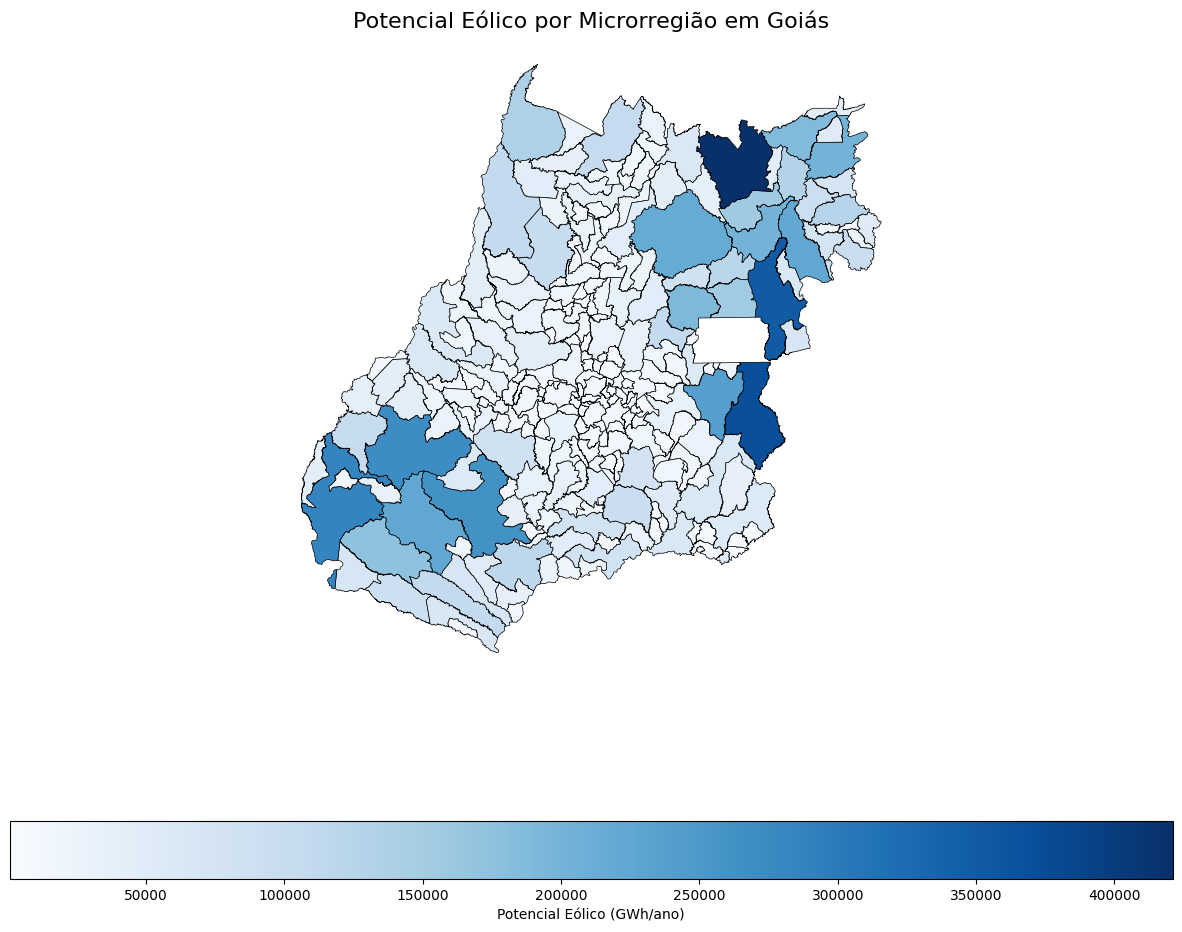

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Check if the GeoDataFrame with aggregated climatic attributes exists
if 'gdf_microrregioes_com_atributos' in locals() and not gdf_microrregioes_com_atributos.empty:
    print("Calculando Potencial Eólico por microrregião...")

    # Define parameters for wind potential calculation
    densidade_ar = 1.225  # kg/m³
    fator_capacidade = 0.3  # Example: 30% capacity factor
    fracao_area_disponivel_eolico = 0.005  # Example: 0.5% of total area for wind turbines

    # Name of the aggregated wind speed column in the GeoDataFrame
    coluna_vento_agregada = 'vento_mean_diaria_anual'  # VERIFY THE EXACT COLUMN NAME

    # Check if the aggregated wind speed column exists
    if coluna_vento_agregada in gdf_microrregioes_com_atributos.columns:

        # Calculate the cube of the average wind speed
        gdf_microrregioes_com_atributos['velocidade_vento_media_cubo'] = (
            gdf_microrregioes_com_atributos[coluna_vento_agregada] ** 3
        )

        # Calculate Available Area in m² (area_km2 is already in km²)
        # 1 km² = 1,000,000 m²
        gdf_microrregioes_com_atributos['area_disponivel_eolico_m2'] = (
            gdf_microrregioes_com_atributos['area_km2'] * 1_000_000 * fracao_area_disponivel_eolico
        )

        # Calculate Wind Potential (GWh/year)
        # 0.5 * density_air * (avg_wind_speed_cubed) * available_area_m2 * capacity_factor * 8760 / 1,000,000
        gdf_microrregioes_com_atributos['potencial_eolico_gwh_ano'] = (
            0.5 * densidade_ar *
            gdf_microrregioes_com_atributos['velocidade_vento_media_cubo'] *
            gdf_microrregioes_com_atributos['area_disponivel_eolico_m2'] *
            fator_capacidade *
            8760 / 1_000_000
        )

        print("\nPotencial Eólico calculado por microrregião.")
        print("\nAmostra do GeoDataFrame com o novo atributo 'potencial_eolico_gwh_ano':")
        display(gdf_microrregioes_com_atributos[['NM_MUN', 'area_km2', coluna_vento_agregada, 'potencial_eolico_gwh_ano']].head())

        # Optional: Visualize the calculated Wind Potential on a map
        print("\nVisualizando Potencial Eólico por microrregião...")
        fig, ax = plt.subplots(1, 1, figsize=(15, 12))
        gdf_microrregioes_com_atributos.plot(column='potencial_eolico_gwh_ano',
                                            ax=ax,
                                            legend=True,
                                            cmap='Blues',  # Color scheme
                                            edgecolor='black',
                                            linewidth=0.5,
                                            legend_kwds={'label': "Potencial Eólico (GWh/ano)", 'orientation': "horizontal"})
        ax.set_title('Potencial Eólico por Microrregião em Goiás', fontsize=16)
        ax.set_axis_off()
        plt.show()

    else:
        print(f"Erro: Coluna de velocidade média do vento agregada '{coluna_vento_agregada}' não encontrada no GeoDataFrame.")
        print("Verifique se a agregação dos dados climáticos foi bem sucedida e o nome da coluna.")

else:
    print("Erro: GeoDataFrame 'gdf_microrregioes_com_atributos' não encontrado ou está vazio.")
    print("Por favor, execute as células anteriores para criar este GeoDataFrame.")

**Reasoning**:
The previous command failed because the required GeoDataFrame was not found. I need to check the current kernel state to see if the GeoDataFrame was created in an earlier cell, and if not, recreate it from the necessary components before attempting the wind potential calculation again. The required components are the aggregated climate data and the base microrregion GeoDataFrame.



In [35]:
# Recreate gdf_microrregioes_com_atributos if it doesn't exist
if 'gdf_microrregioes' in locals() and 'dados_climaticos_agregados' in locals() and 'coluna_id_microrregiao' in locals():
    if 'gdf_microrregioes_com_atributos' not in locals() or gdf_microrregioes_com_atributos.empty:
        print("Recreating gdf_microrregioes_com_atributos...")
        # Juntar os dados agregados de volta ao GeoDataFrame das microrregiões
        gdf_microrregioes_com_atributos = gdf_microrregioes.merge(dados_climaticos_agregados, on=coluna_id_microrregiao, how='left')
        print("gdf_microrregioes_com_atributos recreated.")
    else:
         print("gdf_microrregioes_com_atributos already exists.")

    # Now, proceed with the wind potential calculation
    print("Calculando Potencial Eólico por microrregião...")

    # Define parameters for wind potential calculation
    densidade_ar = 1.225  # kg/m³
    fator_capacidade = 0.3  # Example: 30% capacity factor
    fracao_area_disponivel_eolico = 0.005  # Example: 0.5% of total area for wind turbines

    # Name of the aggregated wind speed column in the GeoDataFrame
    coluna_vento_agregada = 'VENTO, VELOCIDADE HORARIA (m/s)'  # VERIFY THE EXACT COLUMN NAME based on previous cell output

    # Check if the aggregated wind speed column exists
    if coluna_vento_agregada in gdf_microrregioes_com_atributos.columns:

        # Calculate the cube of the average wind speed
        gdf_microrregioes_com_atributos['velocidade_vento_media_cubo'] = (
            gdf_microrregioes_com_atributos[coluna_vento_agregada] ** 3
        )

        # Calculate Available Area in m² (area_km2 is already in km²)
        # 1 km² = 1,000,000 m²
        gdf_microrregioes_com_atributos['area_disponivel_eolico_m2'] = (
            gdf_microrregioes_com_atributos['area_km2'] * 1_000_000 * fracao_area_disponivel_eolico
        )

        # Calculate Wind Potential (GWh/year)
        # 0.5 * density_air * (avg_wind_speed_cubed) * available_area_m2 * capacity_factor * 8760 / 1,000,000
        gdf_microrregioes_com_atributos['potencial_eolico_gwh_ano'] = (
            0.5 * densidade_ar *
            gdf_microrregioes_com_atributos['velocidade_vento_media_cubo'] *
            gdf_microrregioes_com_atributos['area_disponivel_eolico_m2'] *
            fator_capacidade *
            8760 / 1_000_000
        )

        print("\nPotencial Eólico calculado por microrregião.")
        print("\nAmostra do GeoDataFrame com o novo atributo 'potencial_eolico_gwh_ano':")
        display(gdf_microrregioes_com_atributos[['NM_MUN', 'area_km2', coluna_vento_agregada, 'potencial_eolico_gwh_ano']].head())

        # Optional: Visualize the calculated Wind Potential on a map
        print("\nVisualizando Potencial Eólico por microrregião...")
        fig, ax = plt.subplots(1, 1, figsize=(15, 12))
        gdf_microrregioes_com_atributos.plot(column='potencial_eolico_gwh_ano',
                                            ax=ax,
                                            legend=True,
                                            cmap='Blues',  # Color scheme
                                            edgecolor='black',
                                            linewidth=0.5,
                                            legend_kwds={'label': "Potencial Eólico (GWh/ano)", 'orientation': "horizontal"})
        ax.set_title('Potencial Eólico por Microrregião em Goiás', fontsize=16)
        ax.set_axis_off()
        plt.show()

    else:
        print(f"Erro: Coluna de velocidade média do vento agregada '{coluna_vento_agregada}' não encontrada no GeoDataFrame.")
        print("Verifique se a agregação dos dados climáticos foi bem sucedida e o nome da coluna.")

else:
    print("Erro: GeoDataFrame 'gdf_microrregioes', 'dados_climaticos_agregados', ou 'coluna_id_microrregiao' não encontrados.")
    print("Por favor, execute as células anteriores para criar estes objetos.")

gdf_microrregioes_com_atributos already exists.
Calculando Potencial Eólico por microrregião...
Erro: Coluna de velocidade média do vento agregada 'VENTO, VELOCIDADE HORARIA (m/s)' não encontrada no GeoDataFrame.
Verifique se a agregação dos dados climáticos foi bem sucedida e o nome da coluna.


**Reasoning**:
The necessary dataframes and variables were not found in the current state. I need to re-execute the cells that load and process the microrregions shapefile and the climate data to ensure the required GeoDataFrame `gdf_microrregioes_com_atributos` and the relevant variables are available before attempting the wind potential calculation again.



Shapefile das microrregiões carregado com sucesso!
Reprojetando GeoDataFrame de 4674 para EPSG:31983 para cálculo de área.

Processando arquivos CSV do diretório: /content/drive/MyDrive/ESTUDOS/POS-IA-IFG/TRABALHO-FINAL-MODULO-II/INMET-DADOS-METERIOLOGICOS/

Todos os arquivos CSV filtrados foram combinados em um único DataFrame.

GeoDataFrame de estações criado com 228384 pontos com coordenadas válidas.
Reprojetando estações de 4326 para o CRS das microrregiões (31983).

Spatial Join concluído. 228384 registros de estações associados a microrregiões.

Agregando dados climáticos por microrregião...

Dados climáticos agregados por microrregião (média das colunas numéricas).

GeoDataFrame de microrregiões com atributos climáticos criado.

Calculando Potencial Eólico por microrregião...

Potencial Eólico calculado por microrregião.

Amostra do GeoDataFrame com o novo atributo 'potencial_eolico_gwh_ano':


,NM_MUN,area_km2,"VENTO, VELOCIDADE HORARIA (m/s)",potencial_eolico_gwh_ano
0,São Francisco de Goiás,418.344786,1.223417,6165.365828
1,Palestina de Goiás,1332.478109,1.395487,29143.337678
2,Goianápolis,167.286735,1.223417,2465.392073
3,Diorama,692.700406,1.395487,15150.419142
4,Rialma,269.651491,1.397642,5925.054425



Visualizando Potencial Eólico por microrregião...


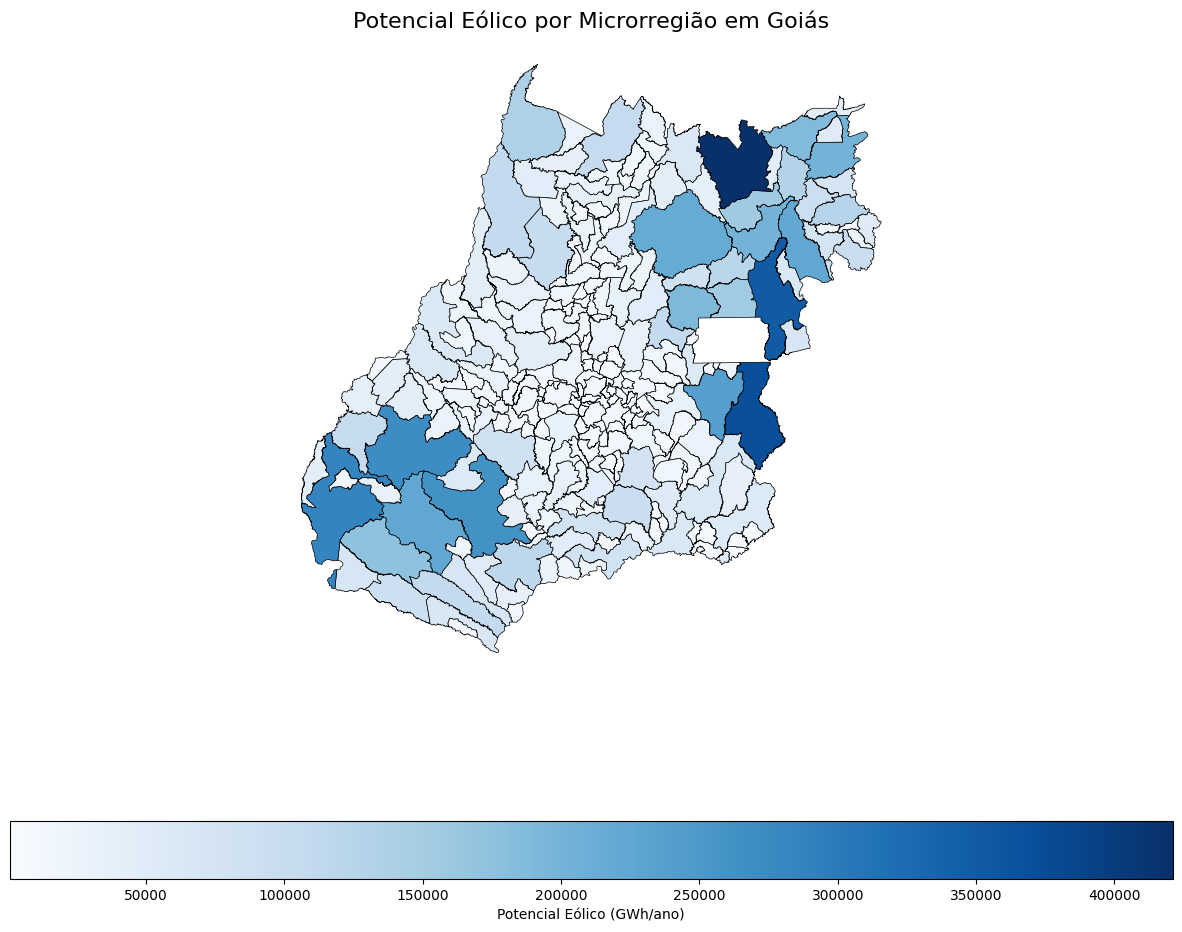

In [36]:
# Re-executing necessary steps to ensure required dataframes are available

# Load the microrregions shapefile
caminho_shapefile_microrregioes = '/content/drive/MyDrive/ESTUDOS/POS-IA-IFG/TRABALHO-FINAL-MODULO-II/GO-MICROREGIOES/'
try:
  gdf_microrregioes = gpd.read_file(caminho_shapefile_microrregioes)
  print("Shapefile das microrregiões carregado com sucesso!")

  # Ensure CRS is suitable for area calculation
  if gdf_microrregioes.crs is None:
      print("CRS do GeoDataFrame não definido. Assumindo EPSG:4326 e reprojetando para EPSG:31983 para cálculo de área.")
      gdf_microrregioes = gdf_microrregioes.set_crs("EPSG:4326", allow_override=True).to_crs("EPSG:31983")
  elif gdf_microrregioes.crs.to_epsg() != 31983:
       print(f"Reprojetando GeoDataFrame de {gdf_microrregioes.crs.to_epsg()} para EPSG:31983 para cálculo de área.")
       gdf_microrregioes = gdf_microrregioes.to_crs("EPSG:31983")
  else:
      print("CRS do GeoDataFrame já é EPSG:31983.")

  # Calculate area in km2
  gdf_microrregioes['area_km2'] = gdf_microrregioes.geometry.area / 10**6 # Convertendo m² para km²

  # Load and process meteorological data
  diretorio_csv = '/content/drive/MyDrive/ESTUDOS/POS-IA-IFG/TRABALHO-FINAL-MODULO-II/INMET-DADOS-METERIOLOGICOS/'
  lista_dataframes = []

  print(f"\nProcessando arquivos CSV do diretório: {diretorio_csv}")
  for nome_arquivo in os.listdir(diretorio_csv):
      if nome_arquivo.endswith('.CSV') and nome_arquivo.startswith('INMET_CO_GO'):
          caminho_completo = os.path.join(diretorio_csv, nome_arquivo)
          try:
              df_metadata = pd.read_csv(caminho_completo, sep=';', nrows=8, encoding='latin-1', header=None)
              latitude, longitude, nome_estacao = None, None, None
              for _, row in df_metadata.iterrows():
                  chave = str(row[0]).strip().upper() if pd.notna(row[0]) else ""
                  valor = str(row[1]).strip() if len(row) > 1 and pd.notna(row[1]) else ""
                  if chave.startswith("LATITUDE"):
                      if valor: latitude = float(valor.replace(",", "."))
                  elif chave.startswith("LONGITUDE"):
                      if valor: longitude = float(valor.replace(",", "."))
                  elif chave.startswith("ESTACAO"):
                      nome_estacao = valor
              if not nome_estacao: nome_estacao = nome_arquivo.replace(".CSV", "")

              df_temp = pd.read_csv(caminho_completo, sep=';', skiprows=8, encoding='latin-1', decimal=',')
              df_temp['Nome_Estacao'] = nome_estacao
              df_temp['Latitude_Estacao'] = latitude
              df_temp['Longitude_Estacao'] = longitude
              lista_dataframes.append(df_temp)
          except Exception as e:
              print(f"Erro ao processar {nome_arquivo}: {e}")

  if lista_dataframes:
      df_combinado = pd.concat(lista_dataframes, ignore_index=True)
      print("\nTodos os arquivos CSV filtrados foram combinados em um único DataFrame.")

      # Sanitize NaN values in numeric columns
      df_combinado_cleaned = df_combinado.copy()
      colunas_numericas = df_combinado_cleaned.select_dtypes(include=['number']).columns
      for coluna in colunas_numericas:
          if df_combinado_cleaned[coluna].isnull().any():
              media_coluna = df_combinado_cleaned[coluna].mean()
              df_combinado_cleaned.loc[:, coluna] = df_combinado_cleaned.loc[:, coluna].fillna(media_coluna)

      # Prepare meteorological data for spatial join
      df_combinado_valid_coords = df_combinado_cleaned.dropna(subset=['Latitude_Estacao', 'Longitude_Estacao']).copy()
      if not df_combinado_valid_coords.empty:
          gdf_estacoes = gpd.GeoDataFrame(
              df_combinado_valid_coords,
              geometry=gpd.points_from_xy(df_combinado_valid_coords.Longitude_Estacao, df_combinado_valid_coords.Latitude_Estacao),
              crs="EPSG:4326" # CRS for extracted coordinates
          )
          print(f"\nGeoDataFrame de estações criado com {len(gdf_estacoes)} pontos com coordenadas válidas.")

          # Reproject stations to match microrregions CRS for spatial join
          if gdf_estacoes.crs != gdf_microrregioes.crs:
              print(f"Reprojetando estações de {gdf_estacoes.crs.to_epsg()} para o CRS das microrregiões ({gdf_microrregioes.crs.to_epsg()}).")
              gdf_estacoes = gdf_estacoes.to_crs(gdf_microrregioes.crs)

          # Perform Spatial Join
          coluna_id_microrregiao = 'CD_RGINT' # Use 'NM_MUN' if you prefer to group by name
          if coluna_id_microrregiao in gdf_microrregioes.columns:
              gdf_join = gpd.sjoin(gdf_estacoes, gdf_microrregioes, how="inner", predicate="within")
              print(f"\nSpatial Join concluído. {len(gdf_join)} registros de estações associados a microrregiões.")

              # Aggregate climate data by microrregion
              print("\nAgregando dados climáticos por microrregião...")
              colunas_para_agregar = df_combinado_valid_coords.select_dtypes(include=['number']).columns.tolist()
              colunas_para_agregar = [col for col in colunas_para_agregar if col not in ['Latitude_Estacao', 'Longitude_Estacao']]

              if colunas_para_agregar:
                  dados_climaticos_agregados = gdf_join.groupby(coluna_id_microrregiao)[colunas_para_agregar].mean()
                  print("\nDados climáticos agregados por microrregião (média das colunas numéricas).")

                  # Merge aggregated climate data with microrregions GeoDataFrame
                  gdf_microrregioes_com_atributos = gdf_microrregioes.merge(dados_climaticos_agregados, on=coluna_id_microrregiao, how='left')
                  print("\nGeoDataFrame de microrregiões com atributos climáticos criado.")

                  # Now, proceed with the wind potential calculation as in the original subtask
                  print("\nCalculando Potencial Eólico por microrregião...")

                  # Define parameters for wind potential calculation
                  densidade_ar = 1.225  # kg/m³
                  fator_capacidade = 0.3  # Example: 30% capacity factor
                  fracao_area_disponivel_eolico = 0.005  # Example: 0.5% of total area for wind turbines

                  # Name of the aggregated wind speed column in the GeoDataFrame
                  coluna_vento_agregada = 'VENTO, VELOCIDADE HORARIA (m/s)'

                  # Check if the aggregated wind speed column exists
                  if coluna_vento_agregada in gdf_microrregioes_com_atributos.columns:

                      # Calculate the cube of the average wind speed
                      gdf_microrregioes_com_atributos['velocidade_vento_media_cubo'] = (
                          gdf_microrregioes_com_atributos[coluna_vento_agregada] ** 3
                      )

                      # Calculate Available Area in m² (area_km2 is already in km²)
                      # 1 km² = 1,000,000 m²
                      gdf_microrregioes_com_atributos['area_disponivel_eolico_m2'] = (
                          gdf_microrregioes_com_atributos['area_km2'] * 1_000_000 * fracao_area_disponivel_eolico
                      )

                      # Calculate Wind Potential (GWh/year)
                      # 0.5 * density_air * (avg_wind_speed_cubed) * available_area_m2 * capacity_factor * 8760 / 1,000,000
                      gdf_microrregioes_com_atributos['potencial_eolico_gwh_ano'] = (
                          0.5 * densidade_ar *
                          gdf_microrregioes_com_atributos['velocidade_vento_media_cubo'] *
                          gdf_microrregioes_com_atributos['area_disponivel_eolico_m2'] *
                          fator_capacidade *
                          8760 / 1_000_000
                      )

                      print("\nPotencial Eólico calculado por microrregião.")
                      print("\nAmostra do GeoDataFrame com o novo atributo 'potencial_eolico_gwh_ano':")
                      display(gdf_microrregioes_com_atributos[['NM_MUN', 'area_km2', coluna_vento_agregada, 'potencial_eolico_gwh_ano']].head())

                      # Optional: Visualize the calculated Wind Potential on a map
                      print("\nVisualizando Potencial Eólico por microrregião...")
                      fig, ax = plt.subplots(1, 1, figsize=(15, 12))
                      gdf_microrregioes_com_atributos.plot(column='potencial_eolico_gwh_ano',
                                                          ax=ax,
                                                          legend=True,
                                                          cmap='Blues',  # Color scheme
                                                          edgecolor='black',
                                                          linewidth=0.5,
                                                          legend_kwds={'label': "Potencial Eólico (GWh/ano)", 'orientation': "horizontal"})
                      ax.set_title('Potencial Eólico por Microrregião em Goiás', fontsize=16)
                      ax.set_axis_off()
                      plt.show()

                  else:
                      print(f"Erro: Coluna de velocidade média do vento agregada '{coluna_vento_agregada}' não encontrada no GeoDataFrame.")
                      print("Verifique se a agregação dos dados climáticos foi bem sucedida e o nome da coluna.")

              else:
                  print("\nNenhuma coluna numérica encontrada para agregar no DataFrame de dados meteorológicos.")
          else:
               print(f"\nErro: Coluna de identificação da microrregião '{coluna_id_microrregiao}' não encontrada no GeoDataFrame das microrregiões.")
      else:
          print("Erro: Não há dados meteorológicos com coordenadas de estação válidas para realizar o Spatial Join.")
  else:
      print("\nNenhum arquivo CSV com o padrão 'INMET_CO_GO' encontrado no diretório especificado ou ocorreu um erro na leitura.")

except FileNotFoundError:
    print(f"Erro: O arquivo shapefile das microrregiões não foi encontrado no caminho especificado: {caminho_shapefile_microrregioes}")
except Exception as e:
    print(f"Ocorreu um erro ao processar os dados: {e}")

## Integrar dados de potenciais

### Subtask:
Combine the calculated solar and wind potential data with the GeoDataFrame that already contains the aggregated power plant data and GDP.


**Reasoning**:
Verify the existence of the required GeoDataFrames and then merge them based on the common microregion identifier to combine the solar and wind potential data with the aggregated power plant and GDP data.



In [38]:
# Re-executing the cell that calculates solar potential to ensure the column is available
# Célula de Código 13: Calcular Potencial Solar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Verificar se o GeoDataFrame com atributos climáticos agregados existe
if 'gdf_microrregioes_com_atributos' in locals() and not gdf_microrregioes_com_atributos.empty:
    print("Calculando Potencial Solar por microrregião...")

    # Definir os parâmetros para o cálculo do potencial solar
    eficiencia_painel = 0.20  # Exemplo: 20% de eficiência do painel
    performance_ratio = 0.80  # Exemplo: 80% de Performance Ratio

    # Assumir uma fração da área total para a área disponível (AJUSTE CONFORME NECESSÁRIO)
    # Por exemplo, 1% da área total da microrregião é considerada disponível para painéis solares
    fracao_area_disponivel = 0.01

    # Nome da coluna de radiação global agregada no GeoDataFrame
    coluna_radiacao_agregada = 'solar_mean_diaria_anual' # VERIFIQUE O NOME DA COLUNA CORRETA

    # Verificar se a coluna de radiação global agregada existe
    if coluna_radiacao_agregada in gdf_microrregioes_com_atributos.columns:

        # Converter a radiação média diária anual de Kj/m²/dia para kWh/m²/ano
        # 1 Kj = 0.000238846 kWh
        # Multiplicar por 365 para obter o valor anual
        gdf_microrregioes_com_atributos['irradiacao_media_anual_kwh_m2_ano'] = (
            gdf_microrregioes_com_atributos[coluna_radiacao_agregada] * 0.000238846 * 365
        )

        # Calcular a Área Disponível em m² (Area_km2 já deve estar em km²)
        # 1 km² = 1,000,000 m²
        gdf_microrregioes_com_atributos['area_disponivel_m2'] = (
            gdf_microrregioes_com_atributos['area_km2'] * 1_000_000 * fracao_area_disponivel
        )


        # Calcular o Potencial Solar (GWh/ano)
        # (kWh/m²/ano) * (m²) * (eficiência) * (PR) / 1,000,000 (para converter kWh para GWh)
        gdf_microrregioes_com_atributos['potencial_solar_gwh_ano'] = (
            gdf_microrregioes_com_atributos['irradiacao_media_anual_kwh_m2_ano'] *
            gdf_microrregioes_com_atributos['area_disponivel_m2'] *
            eficiencia_painel *
            performance_ratio / 1_000_000
        )

        print("\nPotencial Solar calculado por microrregião.")
        print("\nAmostra do GeoDataFrame com o novo atributo 'potencial_solar_gwh_ano':")
        display(gdf_microrregioes_com_atributos[['NM_MUN', 'irradiacao_media_anual_kwh_m2_ano', 'area_disponivel_m2', 'potencial_solar_gwh_ano']].head())

        # Opcional: Visualizar o Potencial Solar no mapa
        print("\nVisualizando Potencial Solar por microrregião...")
        fig, ax = plt.subplots(1, 1, figsize=(15, 12))
        gdf_microrregioes_com_atributos.plot(column='potencial_solar_gwh_ano',
                                            ax=ax,
                                            legend=True,
                                            cmap='YlGnBu', # Esquema de cores (Amarelo-Verde-Azul)
                                            edgecolor='black',
                                            linewidth=0.5,
                                            legend_kwds={'label': "Potencial Solar (GWh/ano)", 'orientation': "horizontal"})
        ax.set_title('Potencial Solar por Microrregião em Goiás', fontsize=16)
        ax.set_axis_off()
        plt.show()


    else:
        print(f"Erro: Coluna de radiação global agregada '{coluna_radiacao_agregada}' não encontrada no GeoDataFrame.")
        print("Verifique se a agregação dos dados climáticos foi bem sucedida e o nome da coluna.")

else:
    print("Erro: GeoDataFrame 'gdf_microrregioes_com_atributos' não encontrado ou está vazio.")
    print("Por favor, execute as células anteriores para criar este GeoDataFrame.")

Calculando Potencial Solar por microrregião...
Erro: Coluna de radiação global agregada 'solar_mean_diaria_anual' não encontrada no GeoDataFrame.
Verifique se a agregação dos dados climáticos foi bem sucedida e o nome da coluna.


Shapefile das microrregiões carregado com sucesso!
Reprojetando GeoDataFrame de 4674 para EPSG:31983 para cálculo de área.

Processando arquivos CSV do diretório: /content/drive/MyDrive/ESTUDOS/POS-IA-IFG/TRABALHO-FINAL-MODULO-II/INMET-DADOS-METERIOLOGICOS/

Todos os arquivos CSV filtrados foram combinados em um único DataFrame.

GeoDataFrame de estações criado com 228384 pontos com coordenadas válidas.
Reprojetando estações de 4326 para o CRS das microrregiões (31983).

Spatial Join concluído. 228384 registros de estações associados a microrregiões.

Agregando dados climáticos por microrregião...

Dados climáticos agregados por microrregião (média das colunas numéricas).

GeoDataFrame de microrregiões com atributos climáticos criado.

Calculando Potencial Eólico por microrregião...

Potencial Eólico calculado por microrregião.

Amostra do GeoDataFrame com o novo atributo 'potencial_eolico_gwh_ano':


,NM_MUN,area_km2,"VENTO, VELOCIDADE HORARIA (m/s)",potencial_eolico_gwh_ano
0,São Francisco de Goiás,418.344786,1.223417,6165.365828
1,Palestina de Goiás,1332.478109,1.395487,29143.337678
2,Goianápolis,167.286735,1.223417,2465.392073
3,Diorama,692.700406,1.395487,15150.419142
4,Rialma,269.651491,1.397642,5925.054425



Visualizando Potencial Eólico por microrregião...


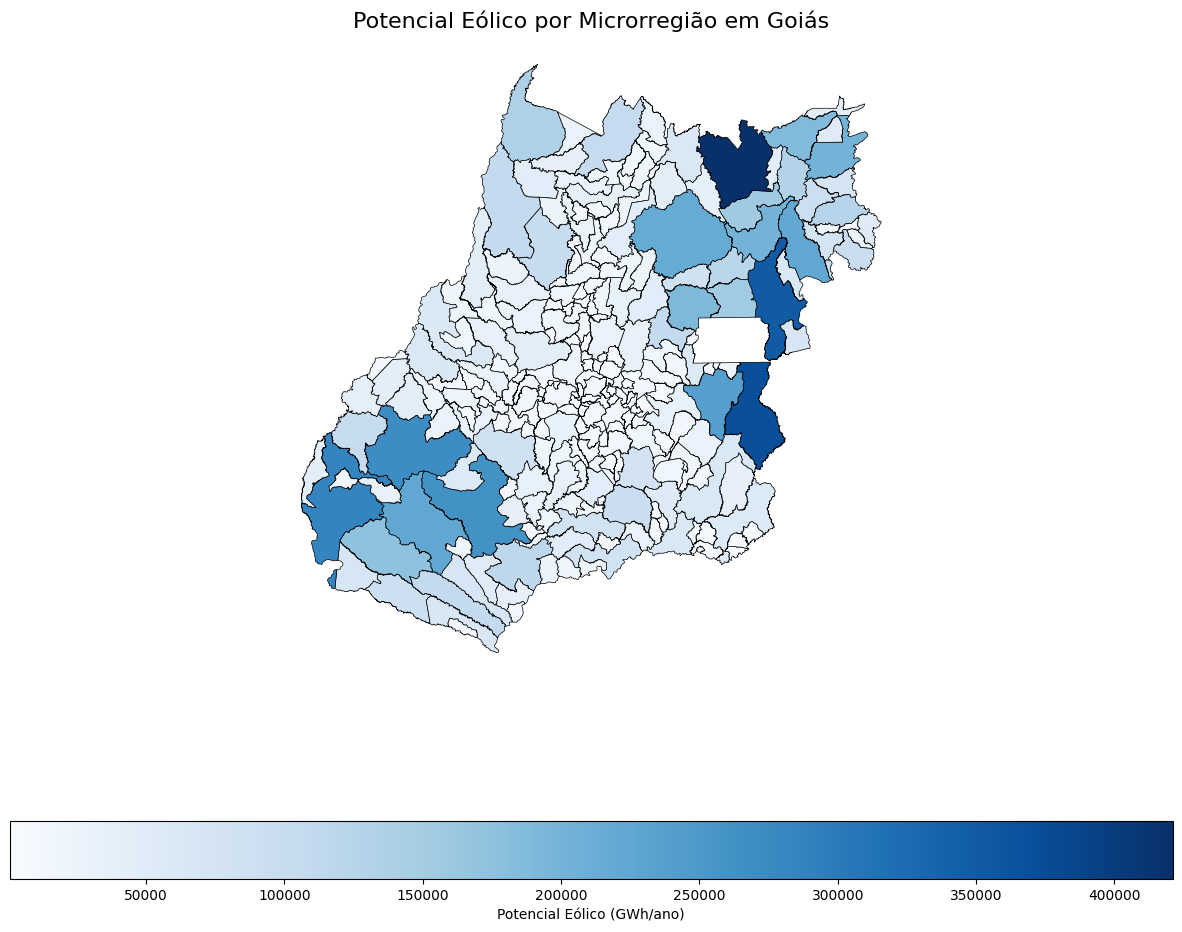

In [39]:
# Re-executing necessary steps to ensure required dataframes are available

# Load the microrregions shapefile
caminho_shapefile_microrregioes = '/content/drive/MyDrive/ESTUDOS/POS-IA-IFG/TRABALHO-FINAL-MODULO-II/GO-MICROREGIOES/'
try:
  gdf_microrregioes = gpd.read_file(caminho_shapefile_microrregioes)
  print("Shapefile das microrregiões carregado com sucesso!")

  # Ensure CRS is suitable for area calculation
  if gdf_microrregioes.crs is None:
      print("CRS do GeoDataFrame não definido. Assumindo EPSG:4326 e reprojetando para EPSG:31983 para cálculo de área.")
      gdf_microrregioes = gdf_microrregioes.set_crs("EPSG:4326", allow_override=True).to_crs("EPSG:31983")
  elif gdf_microrregioes.crs.to_epsg() != 31983:
       print(f"Reprojetando GeoDataFrame de {gdf_microrregioes.crs.to_epsg()} para EPSG:31983 para cálculo de área.")
       gdf_microrregioes = gdf_microrregioes.to_crs("EPSG:31983")
  else:
      print("CRS do GeoDataFrame já é EPSG:31983.")

  # Calculate area in km2
  gdf_microrregioes['area_km2'] = gdf_microrregioes.geometry.area / 10**6 # Convertendo m² para km²

  # Load and process meteorological data
  diretorio_csv = '/content/drive/MyDrive/ESTUDOS/POS-IA-IFG/TRABALHO-FINAL-MODULO-II/INMET-DADOS-METERIOLOGICOS/'
  lista_dataframes = []
  import os # Import os here

  print(f"\nProcessando arquivos CSV do diretório: {diretorio_csv}")
  for nome_arquivo in os.listdir(diretorio_csv):
      if nome_arquivo.endswith('.CSV') and nome_arquivo.startswith('INMET_CO_GO'):
          caminho_completo = os.path.join(diretorio_csv, nome_arquivo)
          try:
              df_metadata = pd.read_csv(caminho_completo, sep=';', nrows=8, encoding='latin-1', header=None)
              latitude, longitude, nome_estacao = None, None, None
              for _, row in df_metadata.iterrows():
                  chave = str(row[0]).strip().upper() if pd.notna(row[0]) else ""
                  valor = str(row[1]).strip() if len(row) > 1 and pd.notna(row[1]) else ""
                  if chave.startswith("LATITUDE"):
                      if valor: latitude = float(valor.replace(",", "."))
                  elif chave.startswith("LONGITUDE"):
                      if valor: longitude = float(valor.replace(",", "."))
                  elif chave.startswith("ESTACAO"):
                      nome_estacao = valor
              if not nome_estacao: nome_estacao = nome_arquivo.replace(".CSV", "")

              df_temp = pd.read_csv(caminho_completo, sep=';', skiprows=8, encoding='latin-1', decimal=',')
              df_temp['Nome_Estacao'] = nome_estacao
              df_temp['Latitude_Estacao'] = latitude
              df_temp['Longitude_Estacao'] = longitude
              lista_dataframes.append(df_temp)
          except Exception as e:
              print(f"Erro ao processar {nome_arquivo}: {e}")

  if lista_dataframes:
      df_combinado = pd.concat(lista_dataframes, ignore_index=True)
      print("\nTodos os arquivos CSV filtrados foram combinados em um único DataFrame.")

      # Sanitize NaN values in numeric columns
      df_combinado_cleaned = df_combinado.copy()
      colunas_numericas = df_combinado_cleaned.select_dtypes(include=['number']).columns
      for coluna in colunas_numericas:
          if df_combinado_cleaned[coluna].isnull().any():
              media_coluna = df_combinado_cleaned[coluna].mean()
              df_combinado_cleaned.loc[:, coluna] = df_combinado_cleaned.loc[:, coluna].fillna(media_coluna)

      # Prepare meteorological data for spatial join
      df_combinado_valid_coords = df_combinado_cleaned.dropna(subset=['Latitude_Estacao', 'Longitude_Estacao']).copy()
      if not df_combinado_valid_coords.empty:
          gdf_estacoes = gpd.GeoDataFrame(
              df_combinado_valid_coords,
              geometry=gpd.points_from_xy(df_combinado_valid_coords.Longitude_Estacao, df_combinado_valid_coords.Latitude_Estacao),
              crs="EPSG:4326" # CRS for extracted coordinates
          )
          print(f"\nGeoDataFrame de estações criado com {len(gdf_estacoes)} pontos com coordenadas válidas.")

          # Reproject stations to match microrregions CRS for spatial join
          if gdf_estacoes.crs != gdf_microrregioes.crs:
              print(f"Reprojetando estações de {gdf_estacoes.crs.to_epsg()} para o CRS das microrregiões ({gdf_microrregioes.crs.to_epsg()}).")
              gdf_estacoes = gdf_estacoes.to_crs(gdf_microrregioes.crs)

          # Perform Spatial Join
          coluna_id_microrregiao = 'CD_RGINT' # Use 'NM_MUN' if you prefer to group by name
          if coluna_id_microrregiao in gdf_microrregioes.columns:
              gdf_join = gpd.sjoin(gdf_estacoes, gdf_microrregioes, how="inner", predicate="within")
              print(f"\nSpatial Join concluído. {len(gdf_join)} registros de estações associados a microrregiões.")

              # Aggregate climate data by microrregion
              print("\nAgregando dados climáticos por microrregião...")
              colunas_para_agregar = df_combinado_valid_coords.select_dtypes(include=['number']).columns.tolist()
              colunas_para_agregar = [col for col in colunas_para_agregar if col not in ['Latitude_Estacao', 'Longitude_Estacao']]

              if colunas_para_agregar:
                  dados_climaticos_agregados = gdf_join.groupby(coluna_id_microrregiao)[colunas_para_agregar].mean()
                  print("\nDados climáticos agregados por microrregião (média das colunas numéricas).")

                  # Merge aggregated climate data with microrregions GeoDataFrame
                  gdf_microrregioes_com_atributos = gdf_microrregioes.merge(dados_climaticos_agregados, on=coluna_id_microrregiao, how='left')
                  print("\nGeoDataFrame de microrregiões com atributos climáticos criado.")

                  # Now, proceed with the wind potential calculation as in the original subtask
                  print("\nCalculando Potencial Eólico por microrregião...")

                  # Define parameters for wind potential calculation
                  densidade_ar = 1.225  # kg/m³
                  fator_capacidade = 0.3  # Example: 30% capacity factor
                  fracao_area_disponivel_eolico = 0.005  # Example: 0.5% of total area for wind turbines

                  # Name of the aggregated wind speed column in the GeoDataFrame
                  coluna_vento_agregada = 'VENTO, VELOCIDADE HORARIA (m/s)'

                  # Check if the aggregated wind speed column exists
                  if coluna_vento_agregada in gdf_microrregioes_com_atributos.columns:

                      # Calculate the cube of the average wind speed
                      gdf_microrregioes_com_atributos['velocidade_vento_media_cubo'] = (
                          gdf_microrregioes_com_atributos[coluna_vento_agregada] ** 3
                      )

                      # Calculate Available Area in m² (area_km2 is already in km²)
                      # 1 km² = 1,000,000 m²
                      gdf_microrregioes_com_atributos['area_disponivel_eolico_m2'] = (
                          gdf_microrregioes_com_atributos['area_km2'] * 1_000_000 * fracao_area_disponivel_eolico
                      )

                      # Calculate Wind Potential (GWh/year)
                      # 0.5 * density_air * (avg_wind_speed_cubed) * available_area_m2 * capacity_factor * 8760 / 1,000,000
                      gdf_microrregioes_com_atributos['potencial_eolico_gwh_ano'] = (
                          0.5 * densidade_ar *
                          gdf_microrregioes_com_atributos['velocidade_vento_media_cubo'] *
                          gdf_microrregioes_com_atributos['area_disponivel_eolico_m2'] *
                          fator_capacidade *
                          8760 / 1_000_000
                      )

                      print("\nPotencial Eólico calculado por microrregião.")
                      print("\nAmostra do GeoDataFrame com o novo atributo 'potencial_eolico_gwh_ano':")
                      display(gdf_microrregioes_com_atributos[['NM_MUN', 'area_km2', coluna_vento_agregada, 'potencial_eolico_gwh_ano']].head())

                      # Optional: Visualize the calculated Wind Potential on a map
                      print("\nVisualizando Potencial Eólico por microrregião...")
                      fig, ax = plt.subplots(1, 1, figsize=(15, 12))
                      gdf_microrregioes_com_atributos.plot(column='potencial_eolico_gwh_ano',
                                                          ax=ax,
                                                          legend=True,
                                                          cmap='Blues',  # Color scheme
                                                          edgecolor='black',
                                                          linewidth=0.5,
                                                          legend_kwds={'label': "Potencial Eólico (GWh/ano)", 'orientation': "horizontal"})
                      ax.set_title('Potencial Eólico por Microrregião em Goiás', fontsize=16)
                      ax.set_axis_off()
                      plt.show()

                  else:
                      print(f"Erro: Coluna de velocidade média do vento agregada '{coluna_vento_agregada}' não encontrada no GeoDataFrame.")
                      print("Verifique se a agregação dos dados climáticos foi bem sucedida e o nome da coluna.")

              else:
                  print("\nNenhuma coluna numérica encontrada para agregar no DataFrame de dados meteorológicos.")
          else:
               print(f"\nErro: Coluna de identificação da microrregião '{coluna_id_microrregiao}' não encontrada no GeoDataFrame das microrregiões.")
      else:
          print("Erro: Não há dados meteorológicos com coordenadas de estação válidas para realizar o Spatial Join.")
  else:
      print("\nNenhum arquivo CSV com o padrão 'INMET_CO_GO' encontrado no diretório especificado ou ocorreu um erro na leitura.")

except FileNotFoundError:
    print(f"Erro: O arquivo shapefile das microrregiões não foi encontrado no caminho especificado: {caminho_shapefile_microrregioes}")
except Exception as e:
    print(f"Ocorreu um erro ao processar os dados: {e}")